# Personal Loan Campaign - AllLife Bank  
## Solution with Logistic regression and Decision tree Modeling 

 Building **Logistic Regression & Decision Tree model** that will help the marketing department to identify the potential customers who have a **higher probability of purchasing the loan**.

## Background and Context
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.


## Objective

* To predict whether a liability customer will buy a personal loan or not.
* Which variables are most significant.
* Which segment of customers should be targeted more.

 Build **Logistic Regression & Decision Tree model** that will help the marketing department to identify the potential customers who have a **higher probability of purchasing the loan**.

## Data Dictionary & Column Details 

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


## Understand Given Data

Read given data to data frame and understand data nature, given features, total records, given data has any missing values or duplicate data, outliers. 

Visualize data and and understand data range and outliers 



### Loading necessary libraries for EDA

Load all standard python library packages.

#### Data Manipulation
* Numpy
* Pandas

#### Data Visualization
* matplotlib.pyplot
* seaborn


In [1]:
import datetime

start = datetime.datetime.now()

# this will help in making the Python code more structured automatically
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


<IPython.core.display.Javascript object>

## Load data to dataframe

Read given csv file `Loan_Modelling.csv` and load to data frame `data`.


In [2]:
# reading loan data given from bank and load to data frame
loan = pd.read_csv("Loan_Modelling.csv")
# copying orignal data so that when changing data we dont lose original
data = loan.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [3]:
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [4]:
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [5]:
data.shape

(5000, 14)

<IPython.core.display.Javascript object>

**observations on data** 

* Given dataset has 5000 rows and 14 columns
* ID column seems like continous num or row number, since its not related with other columns we can delete later. 
* all columns are numeric type, Lets see we can convert these to bins/category during data pre processing.
* Mortgage, Personal_Loan,Securities_Account, CD_account, Online, Creditcard are all boolean type columns.

### Check the data types of the columns in the dataset.

checking data types of all columns 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

**observations on data** 
* as we noted above all columns are numeric type.
* looks like it does not have any missing values, we can confirm that later. 
* Mortgage, Personal_Loan,Securities_Account, CD_account, Online, Creditcard are all boolean type columns but represented as Numeric lets see we have to convert these. 
* Dependent variable Personal_Loan is numeric type column.


### Summary of the data

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

**observations on data** 

* `ID` - as we noted earlier its just row number, this column will be dropped later. 
* `Age` - Age seems to be evenly distributed with Min 23, Max 67 and 25% on 35, 50% on 45 and 75% on 55, Looks like no outliers in age data.
* `Experience` - has some negative values, we have to check this in data pre processing step. otherwise experience seems to be normally distributed.  
* `Income` - Has some outlier data or data needs to be normalized. Min and Max difference, 75% and max difference is very high, Lets fix these data in next stages.
* `ZIPCode` - we might reqd to convert this data into city/state/county or metropolitan data, We cannot use zip code feature directly. 
* `Family` - data seems to be evenly distributed.
* `CCAvg` - Comparing 75% with max, this data might have outliers and reqd some transformation in next stages.
* `Education` - seems to be evenly distributed.
* `Mortgage` - has outliers since 75th and max difference is veru high, we have to normlize this data in next stages.
* `Personal_Loan` - boolean indicator. lets see data spread in next section 
* `Securities_Account`  - boolean indicator. lets see data spread in next section 
* `CD_Account` - boolean indicator. lets see data spread in next section 
* `Online` - boolean indicator. lets see data spread in next section 
* `CreditCard` - boolean indicator. lets see data spread in next section 

### Let's check for missing values

lets check which columns has some null values, how many null values

In [8]:
#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) for all columns in input data frame
    """
    print("\nTotal Null value counts\n")
    print(df.isnull().sum().sort_values(ascending=False))


print_null_info(data)


Total Null value counts

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


<IPython.core.display.Javascript object>

### observations

* data has no missing values 

### Let's check the duplicate data. And if any, we should remove it.

In [9]:
# check for any duplciate data
data[data.duplicated()].shape

(0, 14)

<IPython.core.display.Javascript object>

### observations

* data has no duplicate values 

### Data in category columns 
**Lets us look at different values by features**

In [10]:
#    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
def print_category_value_counts(df, column_names):
    """
    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
    """
    print()
    for typeval, col in zip(df[column_names].dtypes, df[column_names]):
            print()
            print(f"Column name : {col} has total {df[col].nunique()} unique values")
            print()
            print(df[col].value_counts()[0:10])
            print()
            print("-" * 50)


<IPython.core.display.Javascript object>

In [11]:
# print value types and value counts

cols = [
    "Age",
    "Experience",
    "Income",
    "ZIPCode",
    "Family",
    "CCAvg",
    "Education",
    "Mortgage",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]


print_category_value_counts(data, cols)



Column name : Age has total 45 unique values

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
Name: Age, dtype: int64

--------------------------------------------------

Column name : Experience has total 47 unique values

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
Name: Experience, dtype: int64

--------------------------------------------------

Column name : Income has total 162 unique values

44    85
38    84
81    83
41    82
39    81
40    78
42    77
83    74
43    70
45    69
Name: Income, dtype: int64

--------------------------------------------------

Column name : ZIPCode has total 467 unique values

94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
91711     52
94025     52
Name: ZIPCode, dtype: int64

--------------------------------------------------

Column name : Family has total 4 unique values

1    147

<IPython.core.display.Javascript object>

### observations

* `Age` - has 45 unique values, we can create age bin
* `Experience` - has 47 unique values.   
* `Income` - is real numeric values with 162 unique values. Income will vary with indiviuals 
* `ZIPCode` - 467 unique values - can be convered in next stages
* `Family` - 4 unique values
* `CCAvg` - 108 unique values this values will vary with indiviuals 
* `Education` - 3 unique values
* `Mortgage` - Mortgage has total 347 unique values, this values will vary with indiviuals 
* `Personal_Loan`, `Securities_Account`, `CD_Account`, `Online`, `CreditCard` - boolean indicator with 0s and 1s


### Droping ID Column

In [12]:
# Drop ID Columns
data.drop("ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

# Exploratory Data Analysis - Pre Data processing 

Visualize all features before any data clean up and understand what data needs cleaning and fixing.

##  Initial Univariate analysis 

Univariate analysis helps to check data skewness and possible outliers and spread of the data.

**creating a method that can plot univariate chart with histplot, boxplot and barchart %**

In [13]:
## building a Common method to generate graphs


def generate_univariate_chart(data, feature, hue=None, kde=False, bins=20):
    """
    Builds histplot and boxplot for given field.
    Can plot hue, kde and bins based on params, these are optional columns
    """

    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature : {feature}")
    # sns.set_context('poster',font_scale=1)
    # figsize(width,height)

    fig, axes = plt.subplots(2, figsize=(15, 15))
    fig.suptitle("Univariate analysis for " + feature)

    sns.histplot(
        data=data,
        x=feature,
        ax=axes[0],
        palette="winter",
        bins=bins,
        kde=kde,
        hue=hue,
        multiple="dodge",
    )
    sns.boxplot(
        data=data, x=feature, ax=axes[1], showmeans=True, color="violet", hue=hue
    )


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 10))
    else:
        plt.figure(figsize=(n + 1, 10))

    plt.xticks(rotation=90, fontsize=25)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>


## Check all Boolean type features 
### Check how Personal_Loan data is distributed

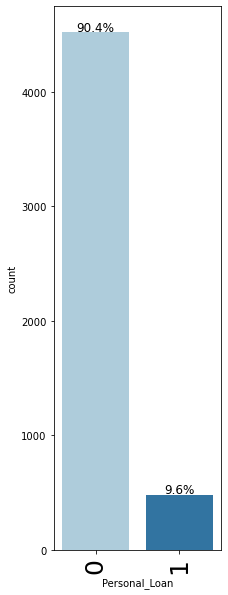

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(data=data, feature="Personal_Loan", perc=True)

### Observation Personal_Loan

* 90.4% values is 0 did not accept loan and 9.6% of data is 1 accpted loan, Data is not even its heavily biased on 0. 
* we dont need to worry about outliers for this column.

### Check how Securities_Account data is distributed

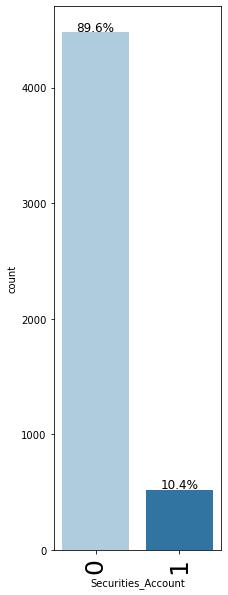

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(data=data, feature="Securities_Account", perc=True)

### Observation Securities_Account

* approx 90% of customers does not have Securities_Account in the bank 
* approx 10% has securites account.
* we have to find out how many of that has accepted personal loan in next steps 


### Check how CD_Account data is distributed

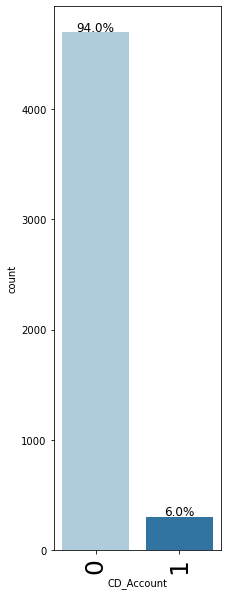

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(data=data, feature="CD_Account", perc=True)

### Observation CD_Account

* 94% bank customers does not have certificate of deposit (CD) account with the bank
* only 6% has certificate of deposit (CD) account
* we have to find out how many of that has accepted personal loan in next steps 


### Check how Online data is distributed

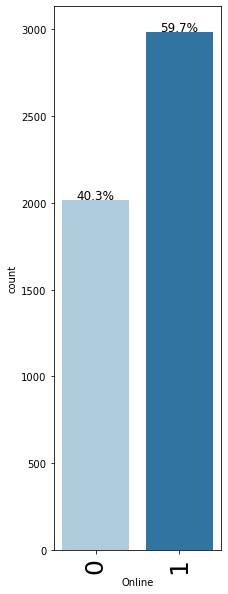

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(data=data, feature="Online", perc=True)

### Observation Online

* approx 60% customer has online accounts 
* 40% customers does not have online accounts
* we have to find out how many of that has accepted personal loan in next steps 

### Check how CreditCard data is distributed

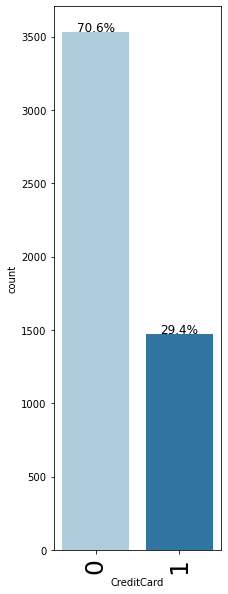

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(data=data, feature="CreditCard", perc=True)

### Observation CreditCard

* 70% customer uses credit card issued by other banks 
* 29.4% customers does not have any credit cards from other banks 
* we have to find out how many of that has accepted personal loan in next steps 

### Check how Age data is distributed

Genrating Charts for feature : Age


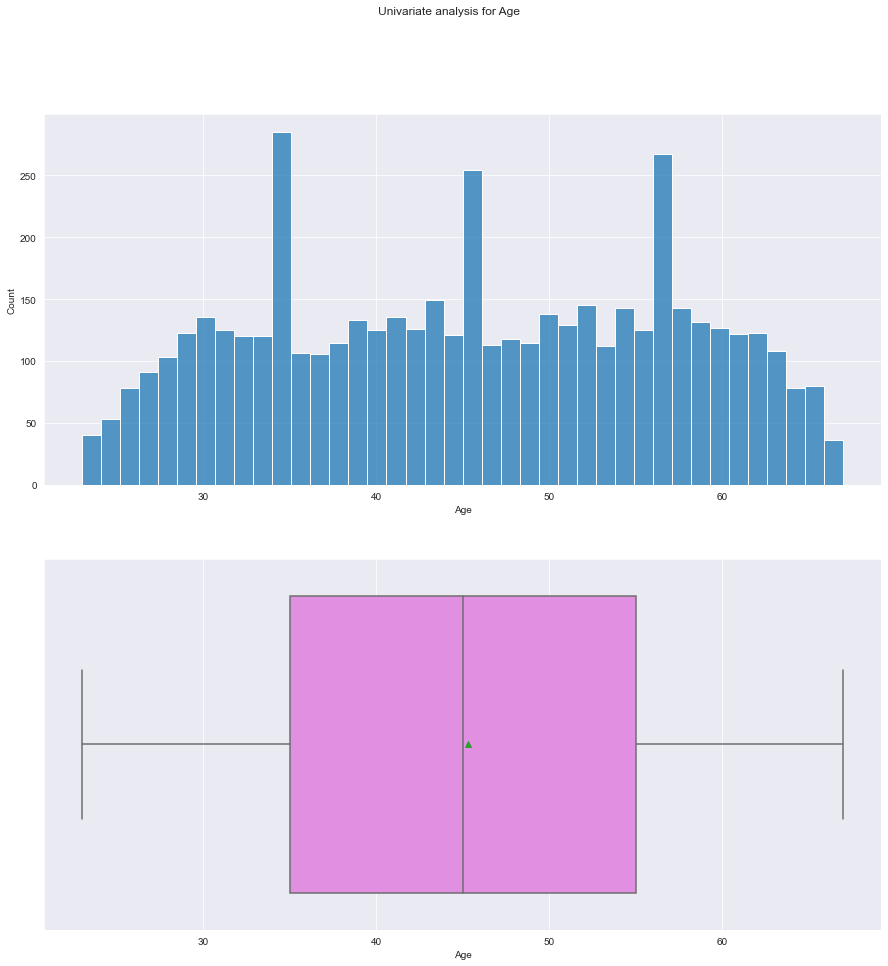

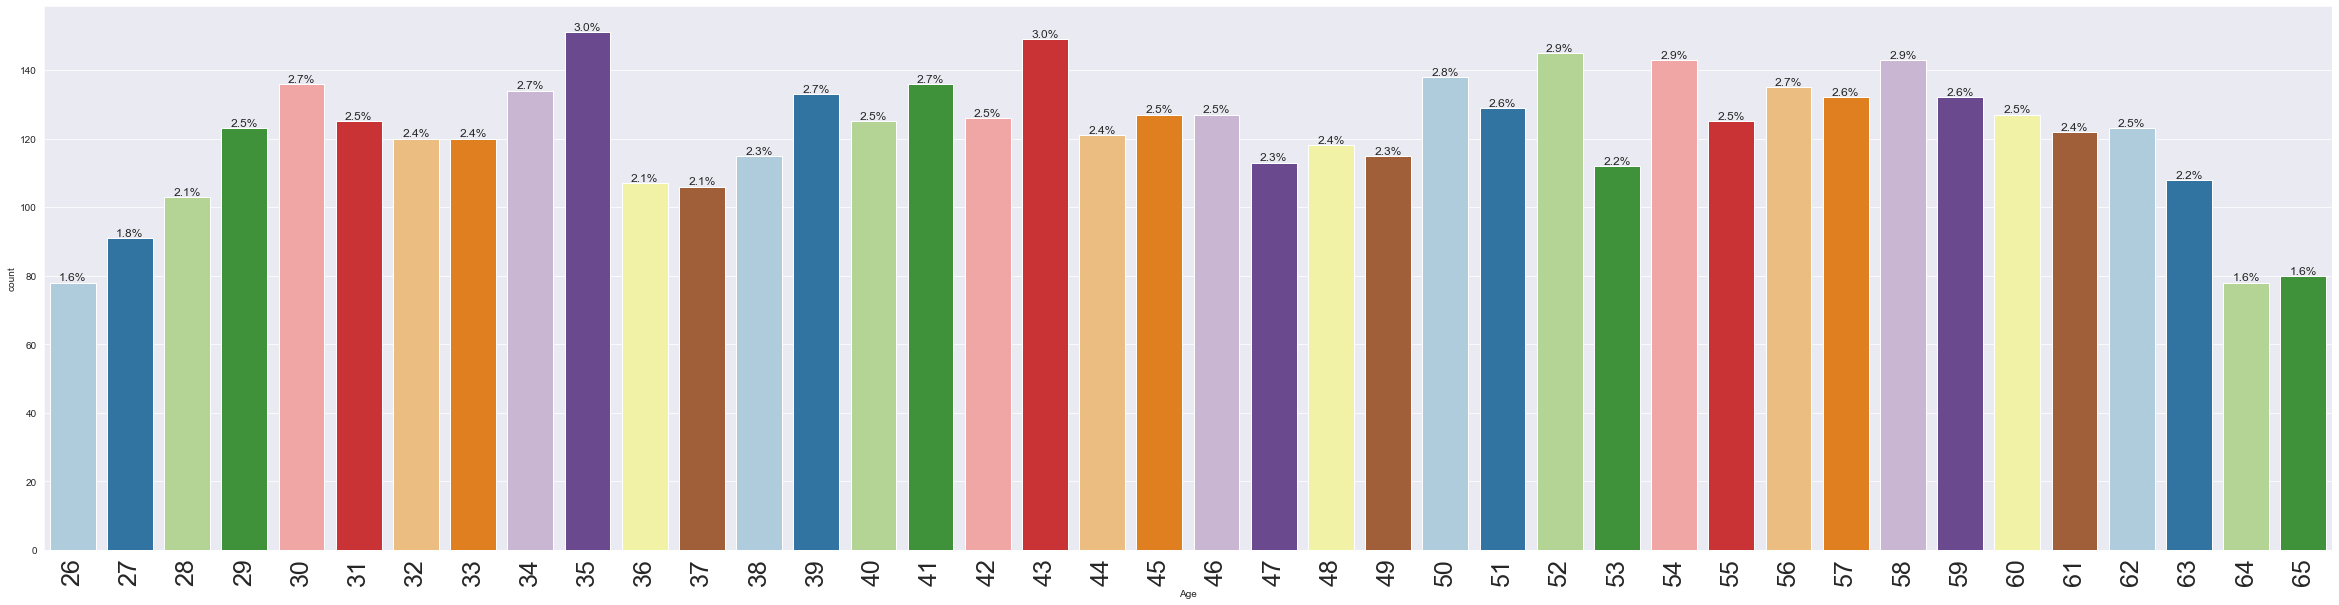

<IPython.core.display.Javascript object>

In [19]:
# with all params
generate_univariate_chart(data=data, feature="Age", hue=None, bins=40, kde=False)
labeled_barplot(data=data, feature="Age", perc=True, n=40)

### Observation Age Data

* AGE is distributed evenly, Mean age is around 45 yrs. Almost each age has 2.5% to 3% data 
* we have to findout which age group accepts loans and which age group has other type of accounts with in bank. Lets check these in next bivariate analysis steps 
* we have to create age bins to calculate & see relationship with other features
* we dont have any outliers in Age data

### Check how Experience data is distributed

Genrating Charts for feature : Experience


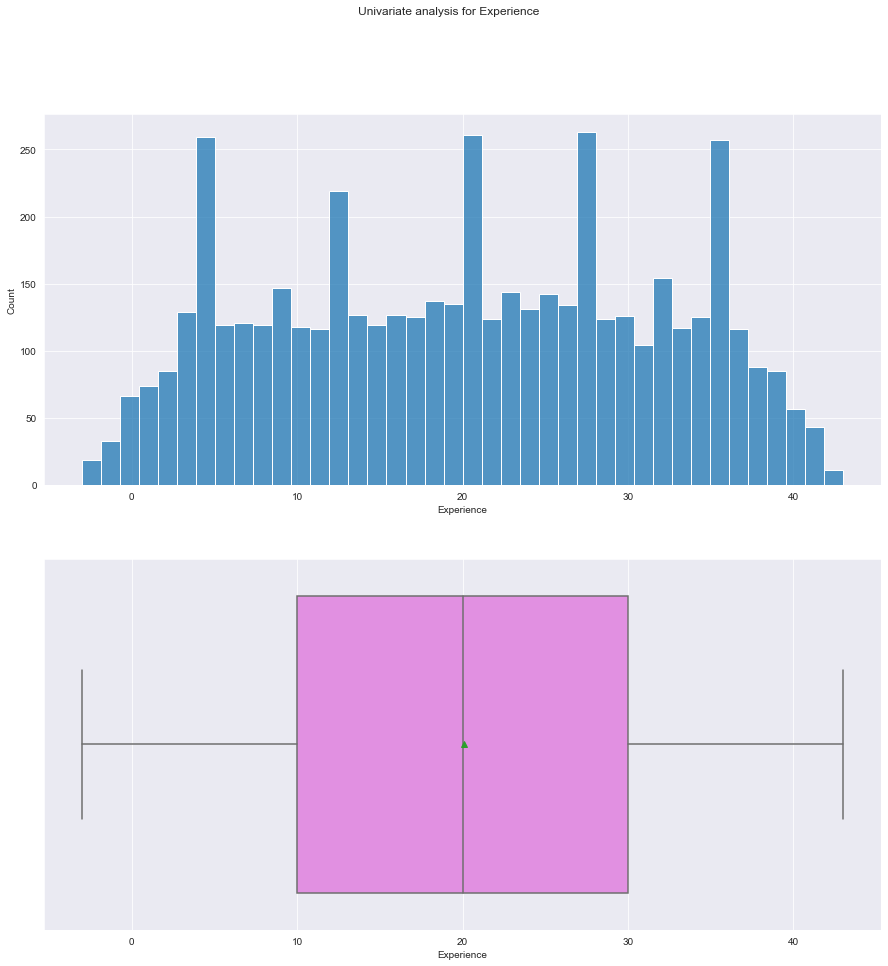

<IPython.core.display.Javascript object>

In [20]:
# with all params
generate_univariate_chart(data=data, feature="Experience", hue=None, bins=40, kde=False)

### Observation Experience

* mostly experience has evenly distibuted. mean exp and 50th percentile falls within in around 20 yrs.
* we have some negative expriences - which we have to analysis in data cleaning section and fix the data. Compare experience with age might resolve the problem
* Q1 and Q3 falls within 10 to 30 yrs. 
* we have to find out how Experience related with accepting loans, age and owing other accounts.

### Check how Income data is distributed

Genrating Charts for feature : Income


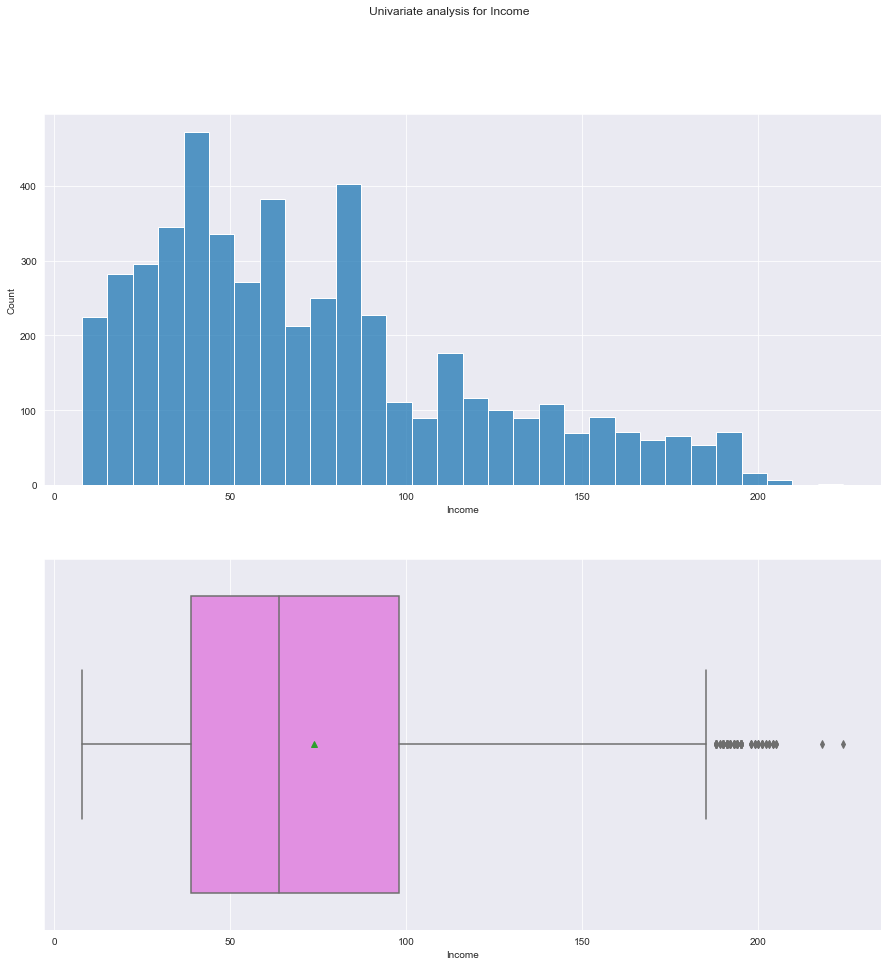

<IPython.core.display.Javascript object>

In [21]:
# with all params
generate_univariate_chart(data=data, feature="Income", hue=None, bins=30, kde=False)

### Observation Income

* income right skewed data with outliers, There are few extreme outliers.
* validate outliers and fix in data preprocessing steps 
* because of outliers mean and median has different income range, mean is around 75 and median is around 65.
* we have to see how income related with loans, age, experience and other features.


### Check how ZIPCode data is distributed

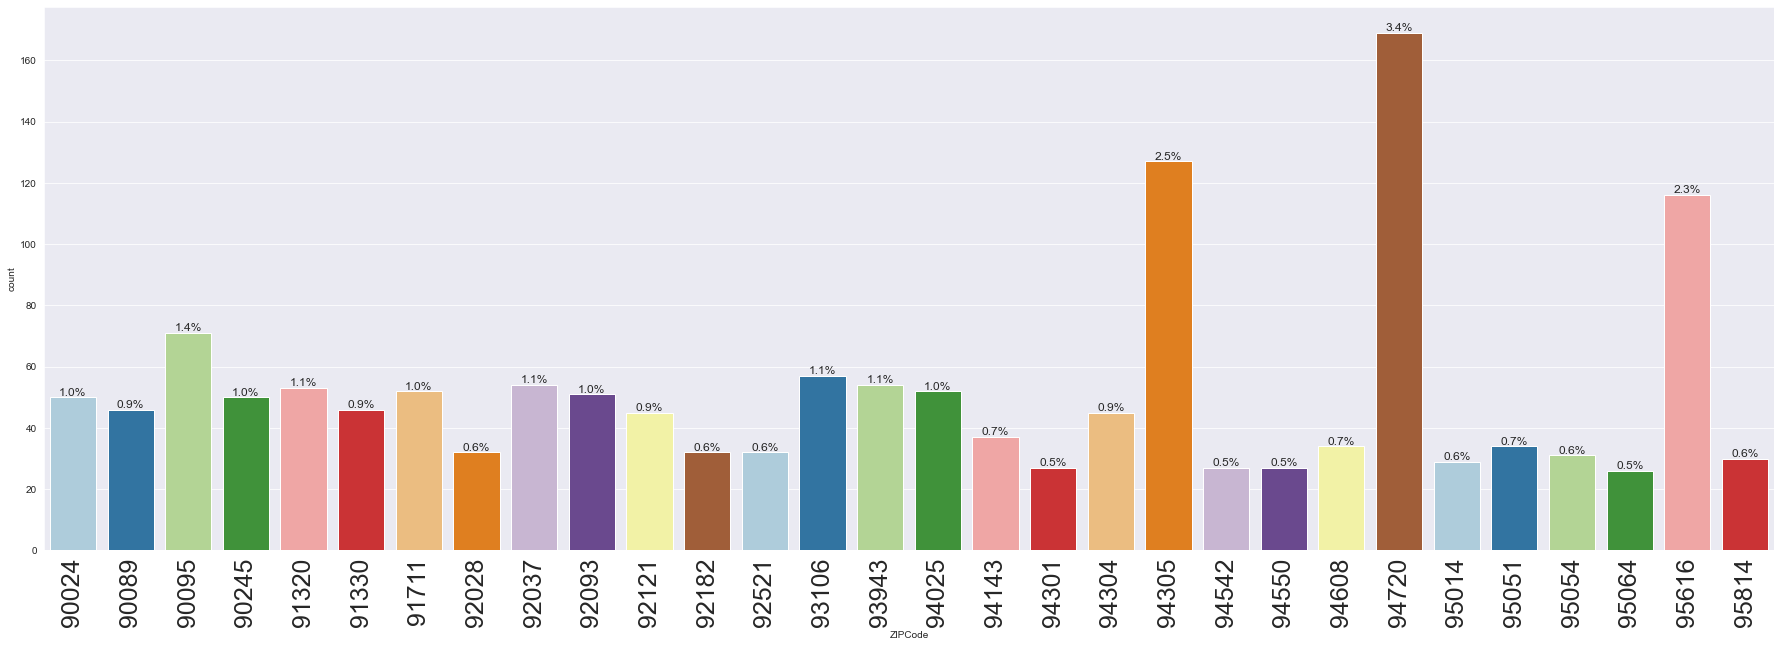

<IPython.core.display.Javascript object>

In [22]:
# with all params
labeled_barplot(data=data, feature="ZIPCode", perc=True, n=30)

### Observation ZIPCode

* we have more than 450 unique values, we have to convert zip code into county or major city metropolitan range and use that as category columns 
* few zip code has more customers, we have to see which area customer accepts loans or owns other accounts with in bank
* lets convert zip code other feature in next steps 

### Check how Family data is distributed

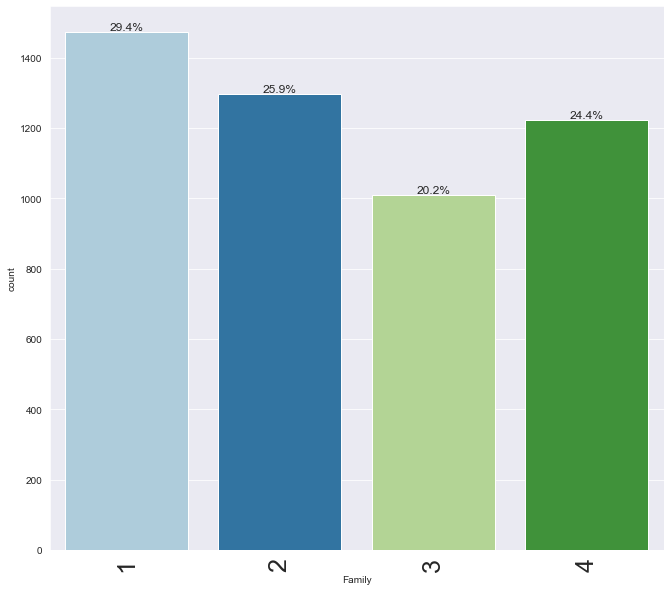

<IPython.core.display.Javascript object>

In [23]:
# with all params
labeled_barplot(data=data, feature="Family", perc=True, n=10)

### Observation Family

* no outliers in family data. all memeber families falls within range 1 to 4.
* looks like most of the customers are single with 1 family, Approx 30%
* 26% are 2 memebers.
* 20% is 3 members 
* 24% is 4 members 
* we have to check how this feature realte with loans and other accounts in next bivariate analysis


### Check how CCAvg data is distributed

Genrating Charts for feature : CCAvg


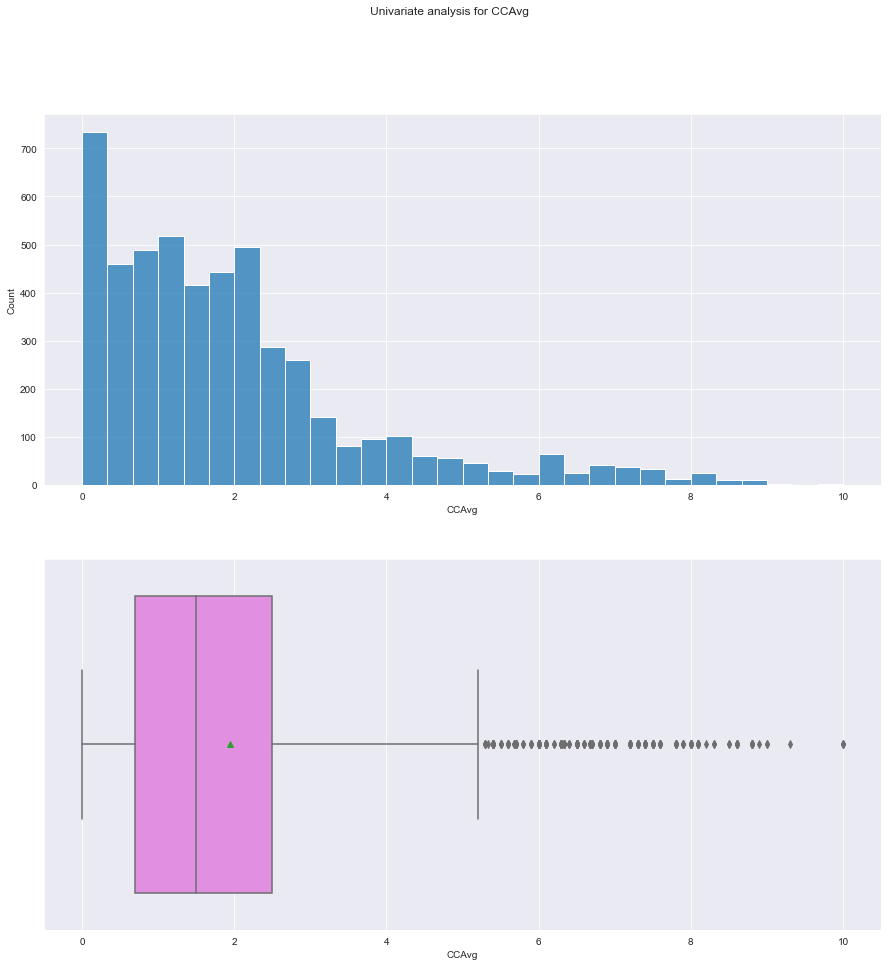

<IPython.core.display.Javascript object>

In [24]:
# with all params
generate_univariate_chart(data=data, feature="CCAvg", hue=None, bins=30, kde=False)

### Observation CCAvg

* credit card ave is right skewed data with outliers.
* mean is around 2K and Median is around 1.7K, mean is impacted becauseo of outliers 
* in genral majority customers has credit card expenses montly range from 1 to 2.5K
* lets fix all the outliers in data cleaning steps

### Check how Education data is distributed

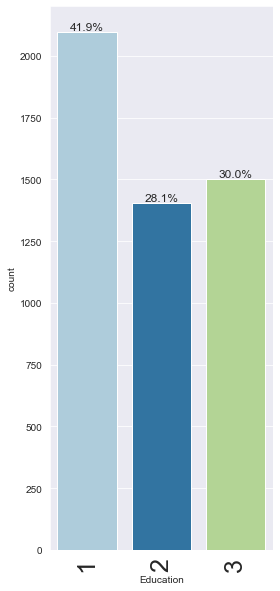

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data=data, feature="Education", perc=True, n=3)

### Observation Education

* all education data falls within range 1 to 3, where 42% is Undergrad, 28% is Graduate and 30% is  Advanced/Professional
* we have to see how this data is related with other features and impacts decisions 

### Check how Mortgage data is distributed

Genrating Charts for feature : Mortgage


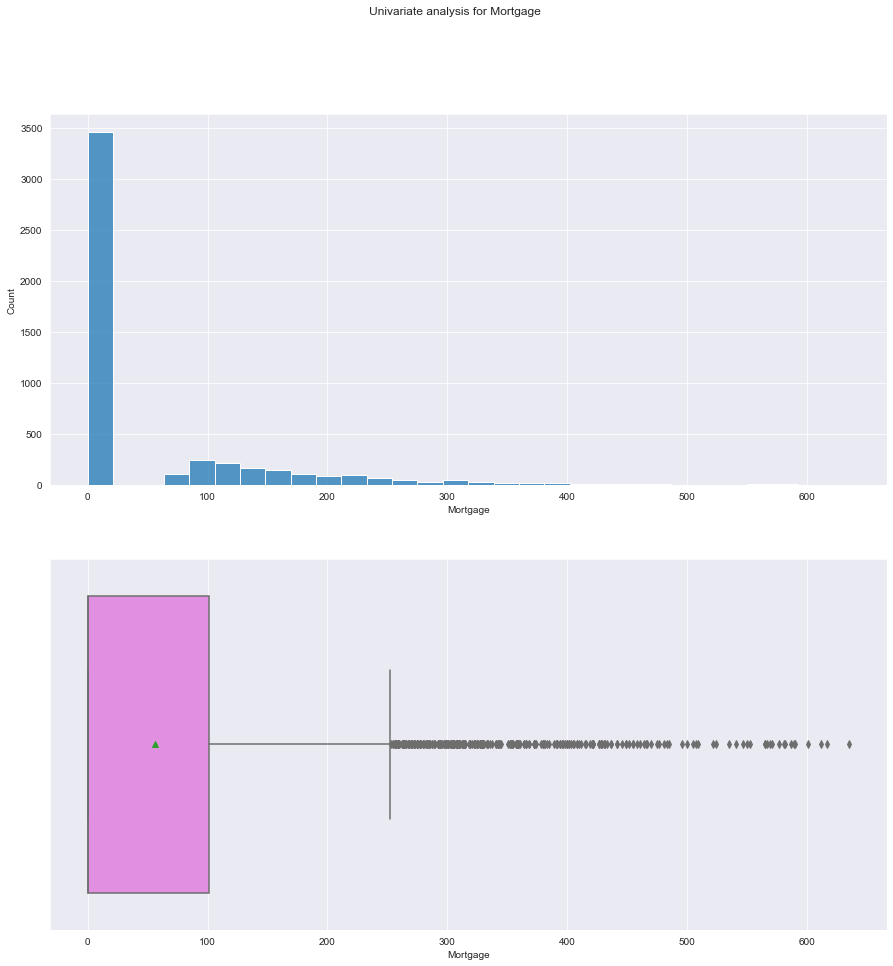

<IPython.core.display.Javascript object>

In [26]:
# with all params
generate_univariate_chart(data=data, feature="Mortgage", hue=None, bins=30, kde=False)

### Observation Mortgage

* Mortgage is heavily right skewed. and lot of outliers 
* more than 50% of customer has no Mortgage, so median is 0 but means falls around 50 because of outliers
* we have to see how mortage is related with age, experience and other accouts and loan

# Insights from Intial Exploratory Data Analysis

**Data Observations** 


* `Age` - has no outliers, but we can convert to bins
* `Experience` - has no outliers, But we find some negative values so those needs treatment.
* `Income` - has outliers, we have to check data and scale data.
* `ZIPCode` - 467 unique values, has no outliers but we cannot use this data as it is so we can convert this into city/county or metropolitan feature.
* `Family` - 4 unique value, No treatments reqd. we have leave this feature as it is.
* `CCAvg` - 108 unique values this values will vary with indiviuals, Has lot of outliers so we have to treat this data and fix and apply scaler. 
* `Education` - 3 unique values -  No treatments reqd. we have leave this feature as it is.
* `Mortgage` - Mortgage has total 347 unique values, this values will vary with indiviuals, Has lot of outliers so we have to treat this data and fix and apply scaler. 
* `Personal_Loan`, `Securities_Account`, `CD_Account`, `Online`, `CreditCard` - boolean indicator with 0s and 1s - no treatmens reqd.


# Data Pre-processing & Data Cleaning, Feature conversions

**Data cleaning and feature conversions based on knowledge gathered from intial data analysis** 


##### Treatment - missing values

**No missing values. So no missing value treatment will be applied** 

##### Treatment - Feature conversions
**Features Age, ZIP Code needs feature conversions** 


### Zip code to county and state 
**finding all customer county and state using zipcode**
**Installed zipcodes 1.1.3 python package to find county** 


##### Note : Already installed zipcodes package.

#### import zipcodes library and setup
**Write a function that can validate given zipcode and find its county and state** 

In [27]:
import zipcodes

# is_real is a method available with zipcodes that can return true or false for given zipcode is valid or not.
# matching method provide data for given zipcode

## find_county_from_zipcode -  building a Common method to generate county and state data using zip code


def find_county_state_from_zipcode(zipcode):
    """
    Zipcodes is a simple library for querying over U.S. zipcode data.
    method will validate input zip code is valid and find county information
    """
    zipcode = str(zipcode)
    if zipcodes.is_real(zipcode):
        zipdata = zipcodes.matching(zipcode)[0]
        return zipdata["county"], zipdata["state"]
    else:
        return None, None


# tesing method with one valid and one invalid data

# valid zip code
print(
    f"valid zip code 30338 county details :  {find_county_state_from_zipcode('30338')}"
)

# invalid zip code
print(
    f"invalid zip code 3038 county details :  {find_county_state_from_zipcode('3038')}"
)

valid zip code 30338 county details :  ('DeKalb County', 'GA')
invalid zip code 3038 county details :  (None, None)


<IPython.core.display.Javascript object>

In [28]:
## add new column called county and state from zipcode

# data["County"], data["State"] = find_county_state_from_zipcode(data["ZIPCode"])


data.loc[:, ["County", "State"]] = [
    find_county_state_from_zipcode(i) for i in data["ZIPCode"]
]

<IPython.core.display.Javascript object>

In [29]:
## lets see some sample values how state and county populated.

data.sample(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,State
2900,52,28,55,91320,2,3.20,3,151,0,0,0,0,0,Ventura County,CA
685,35,8,48,93107,2,1.67,2,0,0,0,0,1,0,Santa Barbara County,CA
2596,33,8,39,95032,3,2.30,1,0,0,0,0,0,0,Santa Clara County,CA
2903,58,34,41,95833,3,1.50,1,0,0,0,0,1,1,Sacramento County,CA
1004,53,23,65,95054,4,2.00,3,0,0,0,0,1,0,Santa Clara County,CA
1285,38,13,113,94720,4,1.70,2,0,1,0,0,0,1,Alameda County,CA
4942,52,26,109,94710,1,2.40,1,308,0,0,1,1,1,Alameda County,CA
3611,64,39,145,92705,1,0.90,1,0,0,0,0,0,0,Orange County,CA
413,32,7,42,92407,3,2.30,1,0,0,0,0,1,0,San Bernardino County,CA
1918,39,9,118,93555,2,6.00,3,246,1,0,1,1,1,Kern County,CA


<IPython.core.display.Javascript object>

In [30]:
print_null_info(data)


Total Null value counts

County                34
State                 34
Age                    0
Experience             0
Income                 0
ZIPCode                0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
dtype: int64


<IPython.core.display.Javascript object>

#### Observation on missing data

* we have fixed most of the data but still 476 columns has missing values, we can search and fix this data manually

In [31]:
# print value types and value counts

colsZip = ["ZIPCode", "County", "State"]
print_category_value_counts(data, colsZip)



Column name : ZIPCode has total 467 unique values

94720    169
94305    127
95616    116
90095     71
93106     57
92037     54
93943     54
91320     53
91711     52
94025     52
Name: ZIPCode, dtype: int64

--------------------------------------------------

Column name : County has total 38 unique values

Los Angeles County      1095
San Diego County         568
Santa Clara County       563
Alameda County           500
Orange County            339
San Francisco County     257
San Mateo County         204
Sacramento County        184
Santa Barbara County     154
Yolo County              130
Name: County, dtype: int64

--------------------------------------------------

Column name : State has total 1 unique values

CA    4966
Name: State, dtype: int64

--------------------------------------------------


<IPython.core.display.Javascript object>

#### Observation on missing value counts

* zip has 467 unique values,  County_State has total 38 unique values - we have reduced this data a lot so this is now ideal for onehot encoding.


**Fix missing data values**


In [32]:
# filter missing county data

data[data["County"].isna()]["ZIPCode"].value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

<IPython.core.display.Javascript object>

 **we dont have data for 4 zip codes, searching and finding data** 
 
 **92717 - Orange, CA**
 **96651 - WASHINGTON, DC**
 **92634 - Fullerton, CA**
 **93077 - Astoria, OR**
 

 

In [33]:
data["County"].loc[data["ZIPCode"] == 92717] = "Orange County"
data["State"].loc[data["ZIPCode"] == 92717] = "CA"

data["County"].loc[data["ZIPCode"] == 96651] = "San Francisco County"
data["State"].loc[data["ZIPCode"] == 96651] = "CA"

data["County"].loc[data["ZIPCode"] == 92634] = "Orange County"
data["State"].loc[data["ZIPCode"] == 92634] = "CA"

data["County"].loc[data["ZIPCode"] == 93077] = "Los Angeles County"
data["State"].loc[data["ZIPCode"] == 93077] = "CA"

<IPython.core.display.Javascript object>

In [34]:
# checking to see still county has any missing values

data[data["County"].isna()].size

# Drop ZipCode Columns
data.drop("ZIPCode", axis=1, inplace=True)

<IPython.core.display.Javascript object>

##### No Missing Data in county and we have found all data using zip code

### Age - Create age bins

In [35]:
# Age Ranges
data["AgeRange"] = pd.cut(
    data["Age"],
    [-np.inf, 18, 30, 40, 50, 60, 70, np.inf],
    labels=["<=18", "19 to 29", "30 to 39", "40 to 49", "50 to 59", "60 to 69", ">=70"],
)


# drop age column
data.drop("Age", axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Experience - Fix negative values & Create Experience bins


In [36]:

# fixing all negative values
data["Experience"] = abs(data["Experience"])


<IPython.core.display.Javascript object>

In [37]:
# Experience Ranges

data["ExperienceRange"] = pd.cut(
    data["Experience"],
    [-np.inf, 1, 3, 6, 10, 15, 20, 30, 40, np.inf],
    labels=[
        "No Experience",
        "<3",
        "3 to 5",
        "6 to 9",
        "10 to 14",
        "15 to 19",
        "20 to 29",
        "30 to 39",
        ">=40",
    ],
)

# drop Experience column
data.drop("Experience", axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Outlier Teartments

* Income,CCAvg and Mortgage are very skewed but all those seems valid values.
* no fix or transformation required for outliers


# Exploratory Data Analysis - Post Data processing / Data Cleaning

Visualize all features after data clean up and understand how data related with each other and with target dependent feature.

### Check the data types of the columns in the dataset.

checking data types of all columns 


In [38]:
# convert all newly added columns as category
cat_vars = ["County", "State", "AgeRange", "ExperienceRange"]
for colname in cat_vars:
    data[colname] = data[colname].astype("category")

<IPython.core.display.Javascript object>

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Income              5000 non-null   int64   
 1   Family              5000 non-null   int64   
 2   CCAvg               5000 non-null   float64 
 3   Education           5000 non-null   int64   
 4   Mortgage            5000 non-null   int64   
 5   Personal_Loan       5000 non-null   int64   
 6   Securities_Account  5000 non-null   int64   
 7   CD_Account          5000 non-null   int64   
 8   Online              5000 non-null   int64   
 9   CreditCard          5000 non-null   int64   
 10  County              5000 non-null   category
 11  State               5000 non-null   category
 12  AgeRange            5000 non-null   category
 13  ExperienceRange     5000 non-null   category
dtypes: category(4), float64(1), int64(9)
memory usage: 412.4 KB


<IPython.core.display.Javascript object>

* all new columns County, State, AgeRange and ExperienceRange are convered as category columns

### Summary of the data

In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0
CreditCard,5000.0,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0


<IPython.core.display.Javascript object>


* no changes on previous observations, since we did not change numerical columns 


### Let's check for missing values

lets check which columns has some null values, how many null values

In [41]:
print_null_info(data)


Total Null value counts

Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
County                0
State                 0
AgeRange              0
ExperienceRange       0
dtype: int64


<IPython.core.display.Javascript object>

* no missing values on any columns 

### Data in category columns  - new columns
**Lets us look at different values by features**

In [42]:
# print value types and value counts

cols = [
    "AgeRange",
    "ExperienceRange",
    "County",
    "State",
]


print_category_value_counts(data, cols)



Column name : AgeRange has total 5 unique values

50 to 59    1323
40 to 49    1270
30 to 39    1236
19 to 29     624
60 to 69     547
<=18           0
>=70           0
Name: AgeRange, dtype: int64

--------------------------------------------------

Column name : ExperienceRange has total 9 unique values

20 to 29         1301
30 to 39         1103
15 to 19          672
10 to 14          581
6 to 9            505
3 to 5            378
<3                233
No Experience     173
>=40               54
Name: ExperienceRange, dtype: int64

--------------------------------------------------

Column name : County has total 38 unique values

Los Angeles County      1096
San Diego County         568
Santa Clara County       563
Alameda County           500
Orange County            366
San Francisco County     263
San Mateo County         204
Sacramento County        184
Santa Barbara County     154
Yolo County              130
Name: County, dtype: int64

------------------------------------

<IPython.core.display.Javascript object>

* we have handled age and experience using bins with less bucket values 
* AgeRange has 5 unique values
* ExperienceRange has total 9 unique values
* all are in california state
* 467 zip codes converted to approx 38 values 


## Univariate analysis on new features

Univariate analysis helps to check data skewness and possible outliers and spread of the data.

**checking how every feature has data after data cleaning and how it is related with dependent variables**

In [43]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    """
    function to plot distributions wrt target
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


## this method generate joint plot of x vs y feature
def generate_bivariate_chart(data, xfeature, yfeature, hue=None):
    """
    common method to generate joint plot for various columns
    hue param is optional
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature x : {xfeature}, y : {yfeature}")

    sns.jointplot(
        data=data,
        x=xfeature,
        y=yfeature,
        palette="winter",
        height=10,
        kind="scatter",
        hue=hue,
    )

<IPython.core.display.Javascript object>

### AgeRange vs Personal_Loan

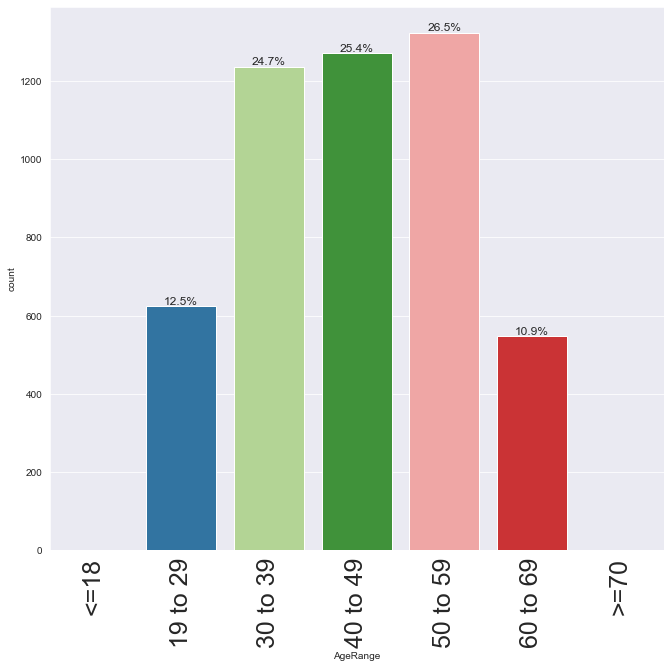

Personal_Loan     0    1   All
AgeRange                      
All            4520  480  5000
40 to 49       1148  122  1270
30 to 39       1118  118  1236
50 to 59       1208  115  1323
19 to 29        558   66   624
60 to 69        488   59   547
----------------------------------------------------------------------------------------------------


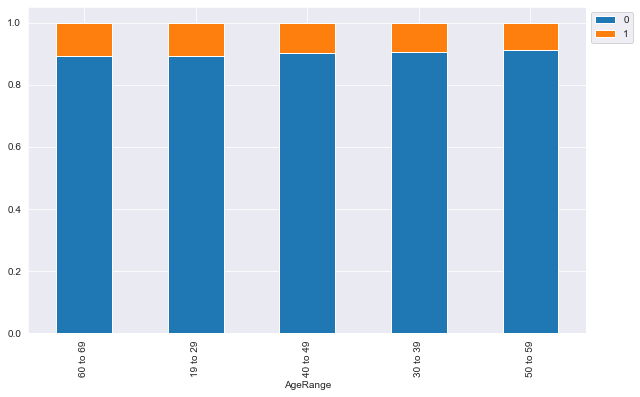

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(data=data, feature="AgeRange", perc=True, n=10)
stacked_barplot(data, "AgeRange", "Personal_Loan")

### Observation on AgeRange with Personal_Loan

* age range 30 to 59 is most of customers 
* all age group accepted personal loan last year similar %
* 30 to 59 is most of customers accepted personal loan

### ExperienceRange vs Personal_Loan

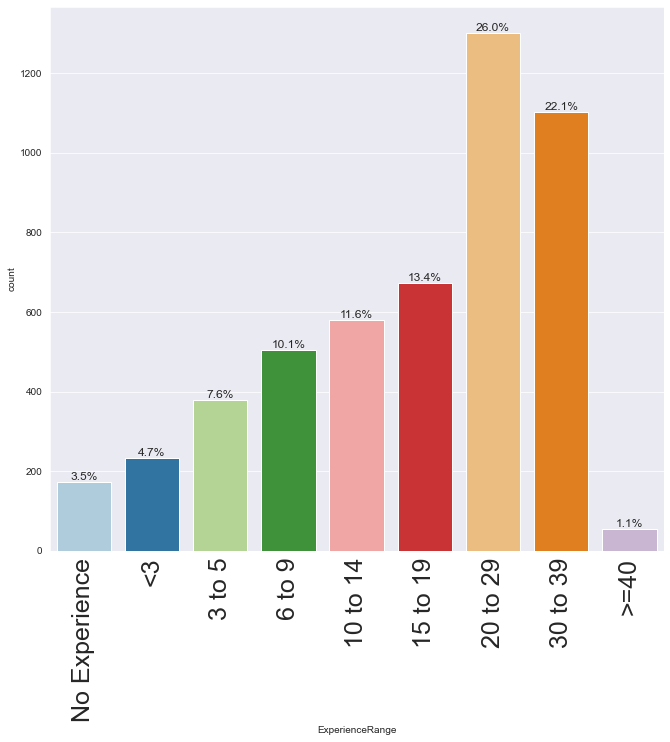

Personal_Loan       0    1   All
ExperienceRange                 
All              4520  480  5000
20 to 29         1182  119  1301
30 to 39         1000  103  1103
15 to 19          605   67   672
6 to 9            448   57   505
10 to 14          530   51   581
3 to 5            343   35   378
<3                207   26   233
No Experience     158   15   173
>=40               47    7    54
----------------------------------------------------------------------------------------------------


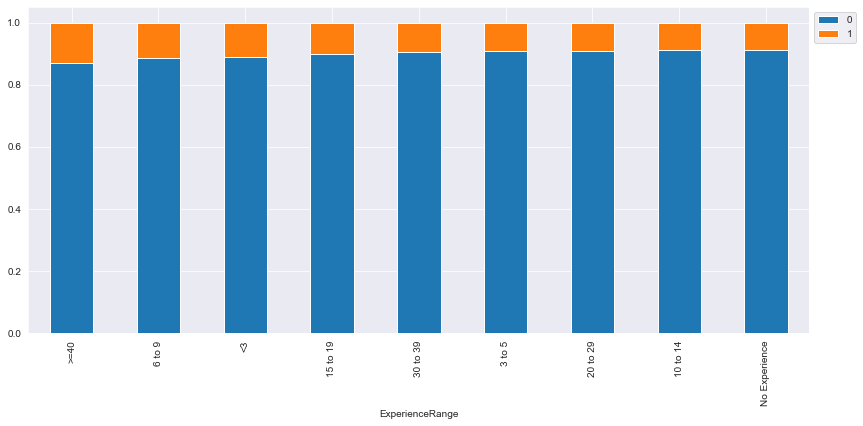

<IPython.core.display.Javascript object>

In [45]:
labeled_barplot(data=data, feature="ExperienceRange", perc=True, n=10)
stacked_barplot(data, "ExperienceRange", "Personal_Loan")

### Observation on ExperienceRange with Personal_Loan

* most of the customers falls within 20 to 39 yrs exp 
* we do have customer falls in all exp range from none to 40+yrs got loans 
* in all expereince range 10-17% cusomers got loans

###  County vs Personal_Loan

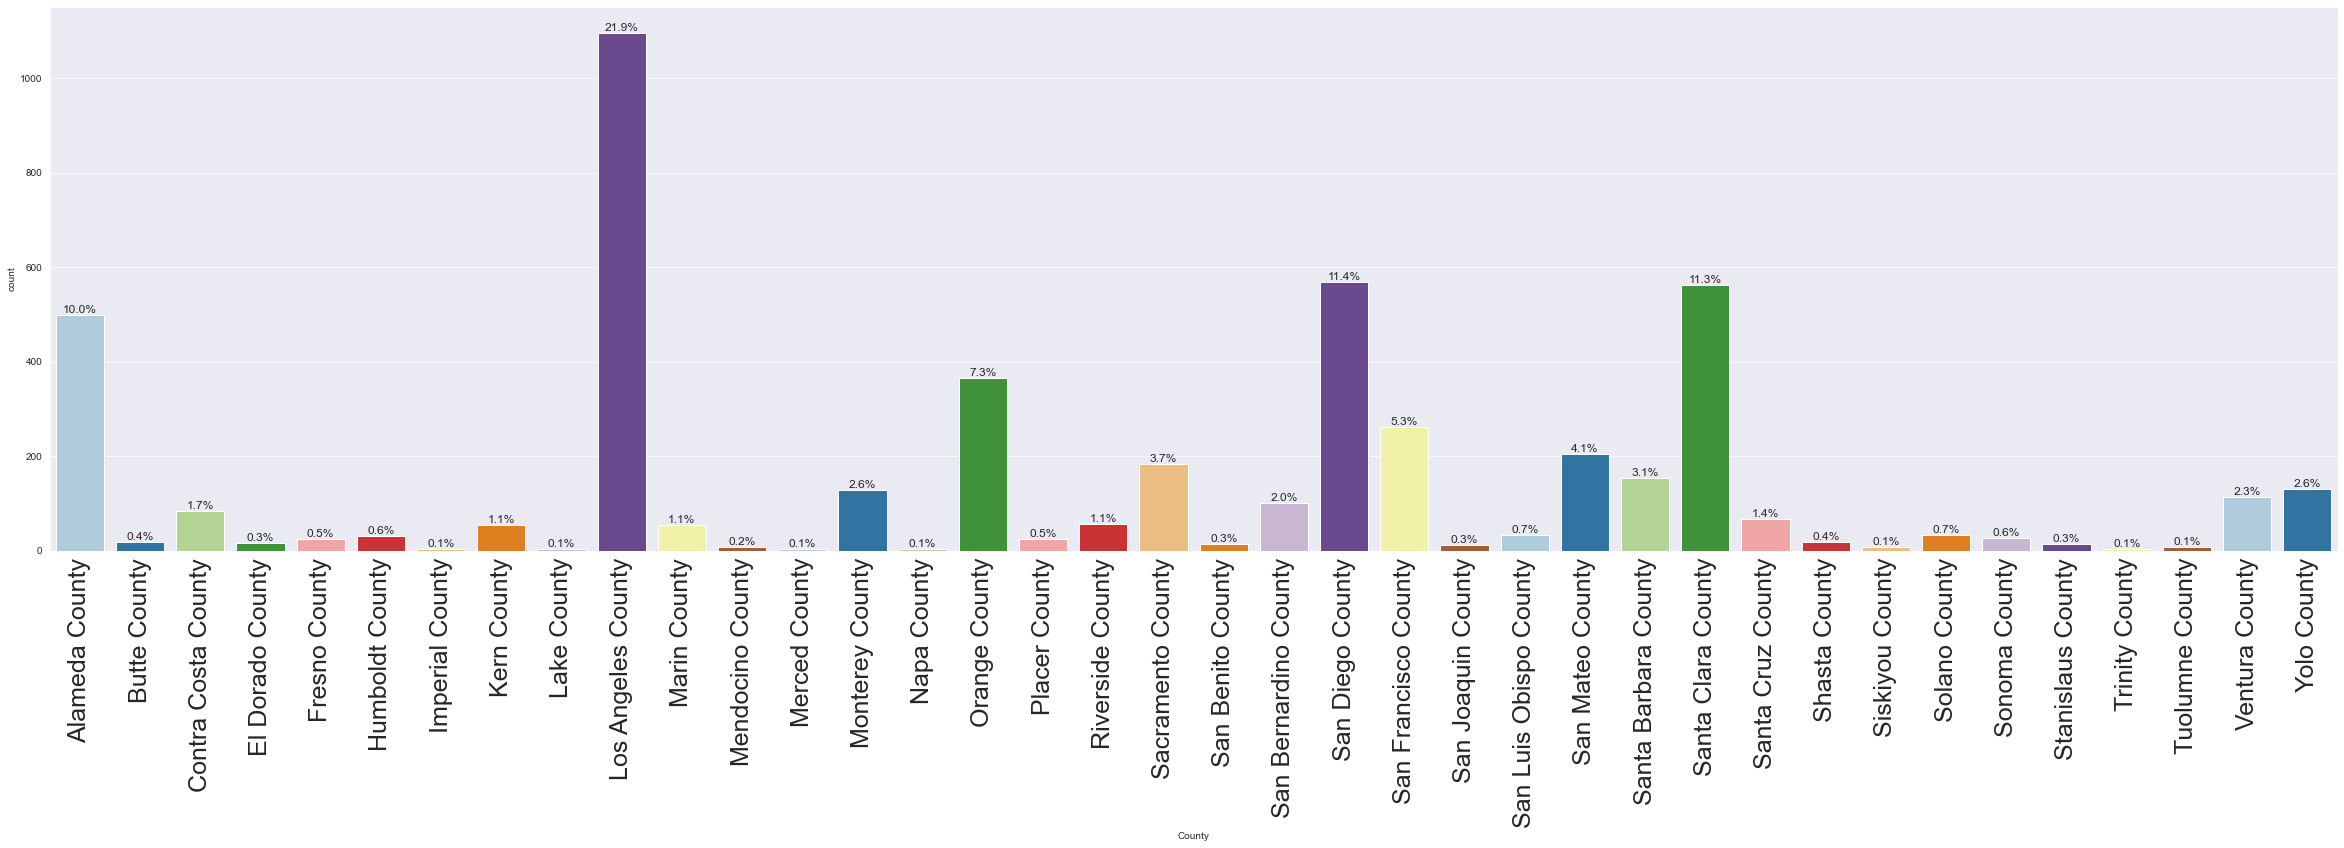

Personal_Loan              0    1   All
County                                 
All                     4520  480  5000
Los Angeles County       985  111  1096
Santa Clara County       492   71   563
San Diego County         509   59   568
Alameda County           456   44   500
Orange County            333   33   366
San Francisco County     244   19   263
Monterey County          113   15   128
Sacramento County        169   15   184
Contra Costa County       73   12    85
San Mateo County         192   12   204
Ventura County           103   11   114
Santa Barbara County     143   11   154
Santa Cruz County         60    8    68
Yolo County              122    8   130
Kern County               47    7    54
Sonoma County             22    6    28
Marin County              48    6    54
Riverside County          50    6    56
San Luis Obispo County    28    5    33
Solano County             30    3    33
San Bernardino County     98    3   101
Shasta County             15    3    18


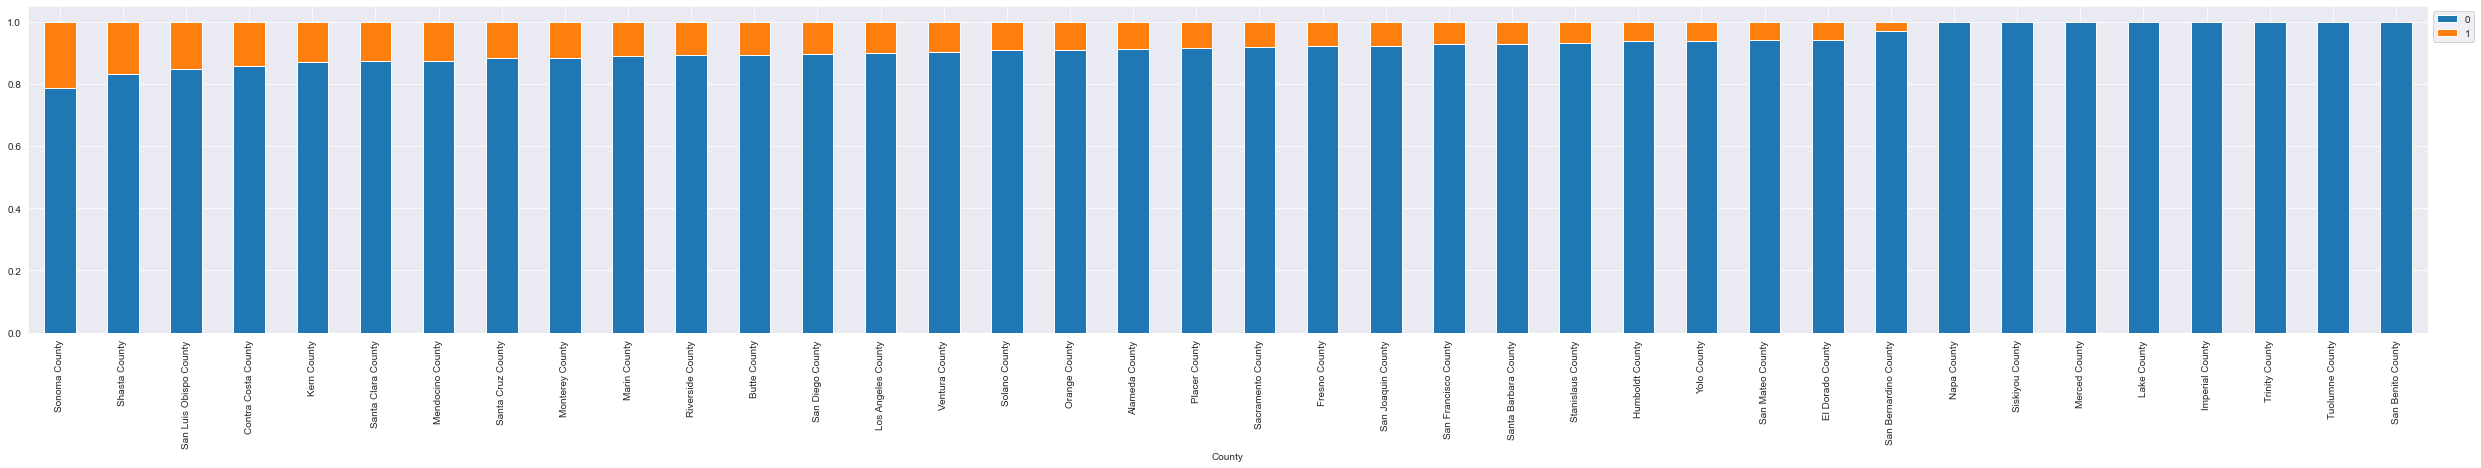

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(data=data, feature="County", perc=True, n=40)
stacked_barplot(data, "County", "Personal_Loan")

### Observation on County with Personal_Loan

* Los Angeles County , Santa Clara County, San Diego County and Alameda County  has most of the customers, other counties has customers lesser than these 4
* Los Angeles County , Santa Clara County, San Diego County and Alameda County most loans counties.

## Bivariate Analysis

lets see how feature are related to each other and how its relation with target feature 
### Income vs CCAvg  on Loan 

Genrating Charts for feature x : Income, y : CCAvg


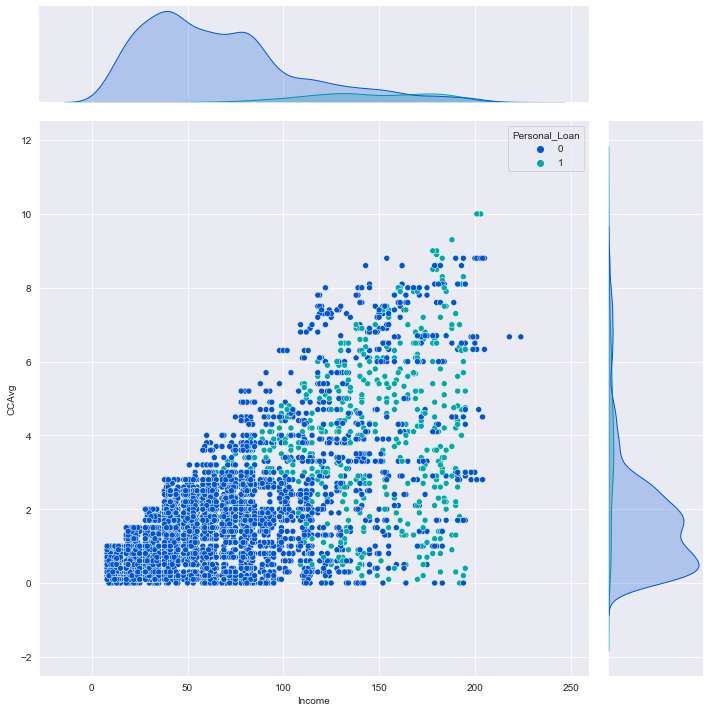

<IPython.core.display.Javascript object>

In [47]:
generate_bivariate_chart(
    xfeature="Income", yfeature="CCAvg", data=data, hue="Personal_Loan"
)

### Income vs CCAvg  on Loan  - Observations

* we can see a postive relationship when income increases CCAvg also increase. 
* Also noting less income customer has not got loans last year. We see customer making more than 50K was given loans.

### Income vs Mortage  on Loan 

Genrating Charts for feature x : Income, y : Mortgage


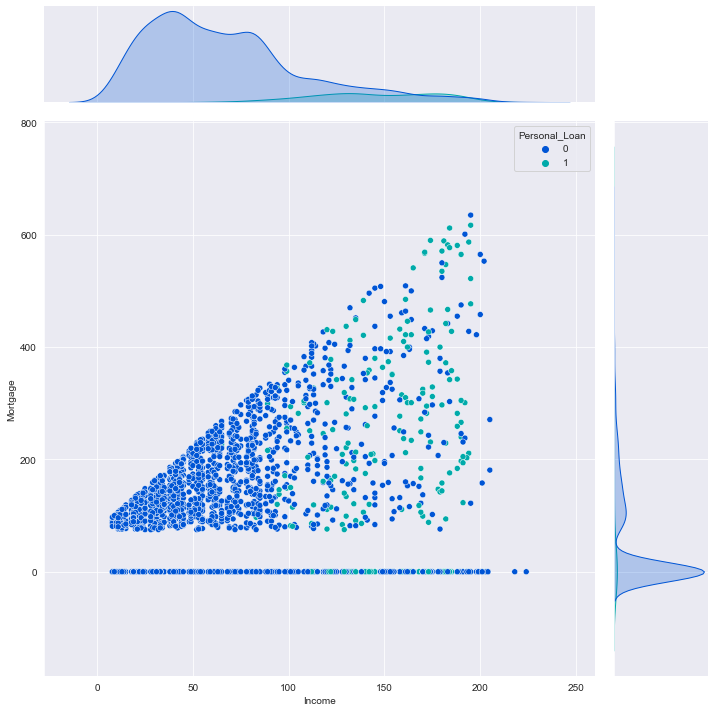

<IPython.core.display.Javascript object>

In [48]:
generate_bivariate_chart(
    xfeature="Income", yfeature="Mortgage", data=data, hue="Personal_Loan"
)

### Income vs Mortage  on Loan  - Observations

* we can see a postive relationship when income increases mortgage also increase. 
* Also noting less income customer has not got loans last year. We see customer making more than 100K with mortgage was given loans.
* also there are people with 0 income has loans. We have to check they got any accounts to get loans.


### Mortgage vs CCAvg  on Loan 

Genrating Charts for feature x : Mortgage, y : CCAvg


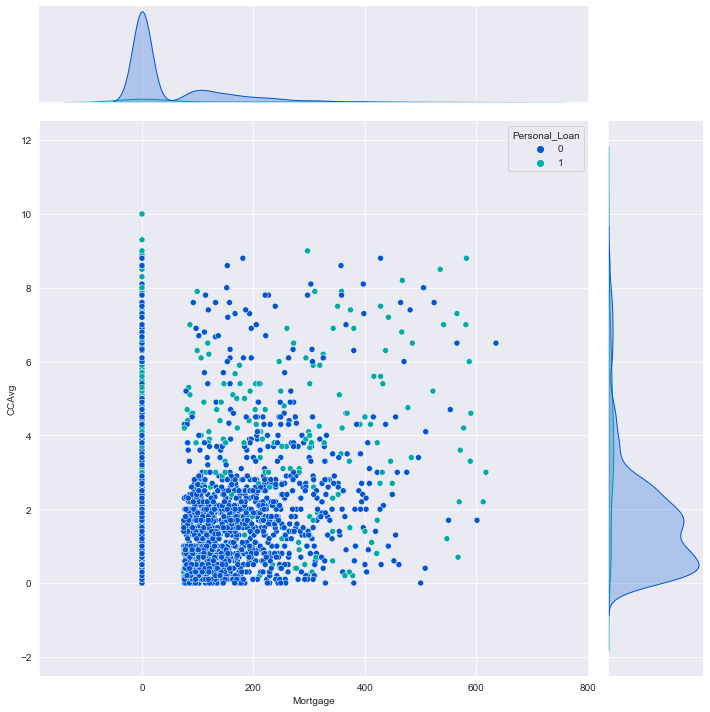

<IPython.core.display.Javascript object>

In [49]:
generate_bivariate_chart(
    xfeature="Mortgage", yfeature="CCAvg", data=data, hue="Personal_Loan"
)

### Mortgage vs CCAvg  on Loan  - Observations

* Mortgage and CCAvg did not have any direct relationship, Data is spread accorss low and high end. 


### Family vs Personal_Loan 

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
----------------------------------------------------------------------------------------------------


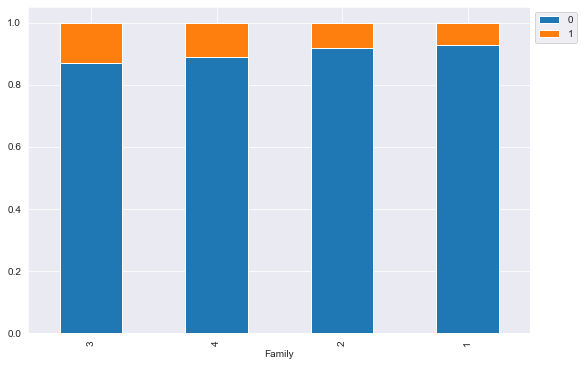

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(data, "Family", "Personal_Loan")

### observations 

* Big family like 3 or 4 family got most of the loans.
* we do see loans on 1 and 2 family, not big as 3 or 4. 

### Education vs Personal_Loan 

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
----------------------------------------------------------------------------------------------------


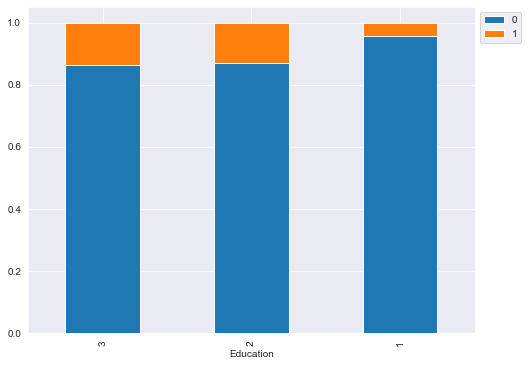

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(data, "Education", "Personal_Loan")

### observations

* Graduate & Advanced/Professional where given more loans compared to undergrad. 



Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
----------------------------------------------------------------------------------------------------


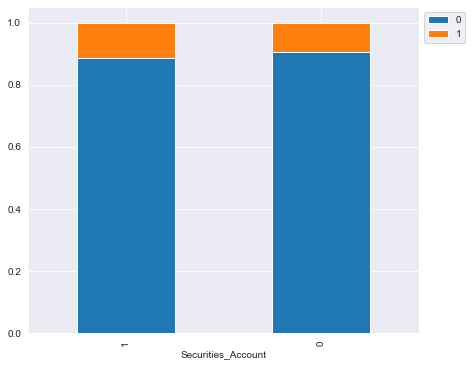

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

### observations

* customer had security account has given more loan compared to no account holders. But the difference is very small. 



Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
----------------------------------------------------------------------------------------------------


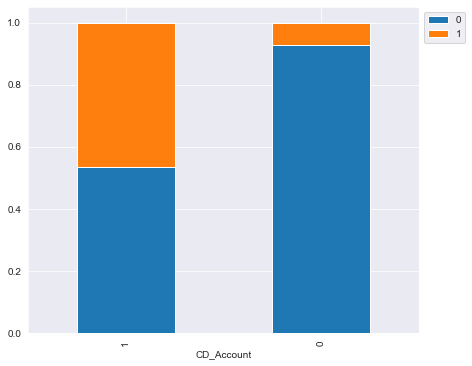

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

### observations

* Customer had CD Account approx 50% of the given loans. 
* Customers with out CD account also given loans but the ratio is smaller when compared to customer had account.



Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
----------------------------------------------------------------------------------------------------


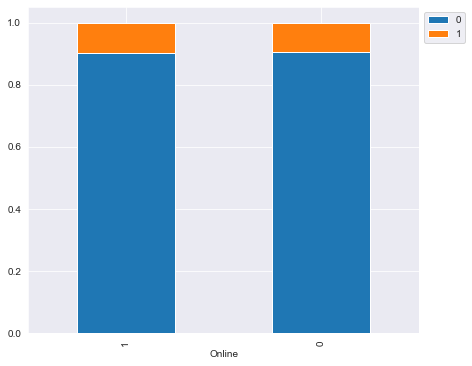

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(data, "Online", "Personal_Loan")

### observations

* Looks like no real difference b/w customer had online account or not who was given loan.



Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
----------------------------------------------------------------------------------------------------


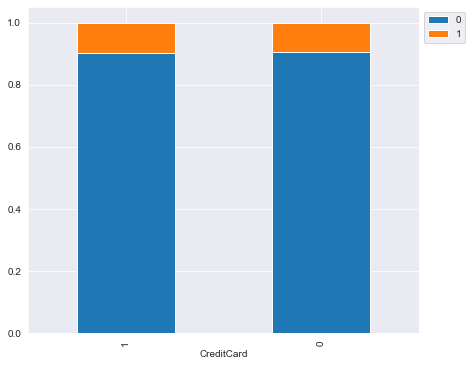

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

### observations

* Looks like no real difference b/w customer had credit card with other bank  or not who was given loan.



## Identify Correlation in data 

lets check how the target feature related with other features and relationship between features

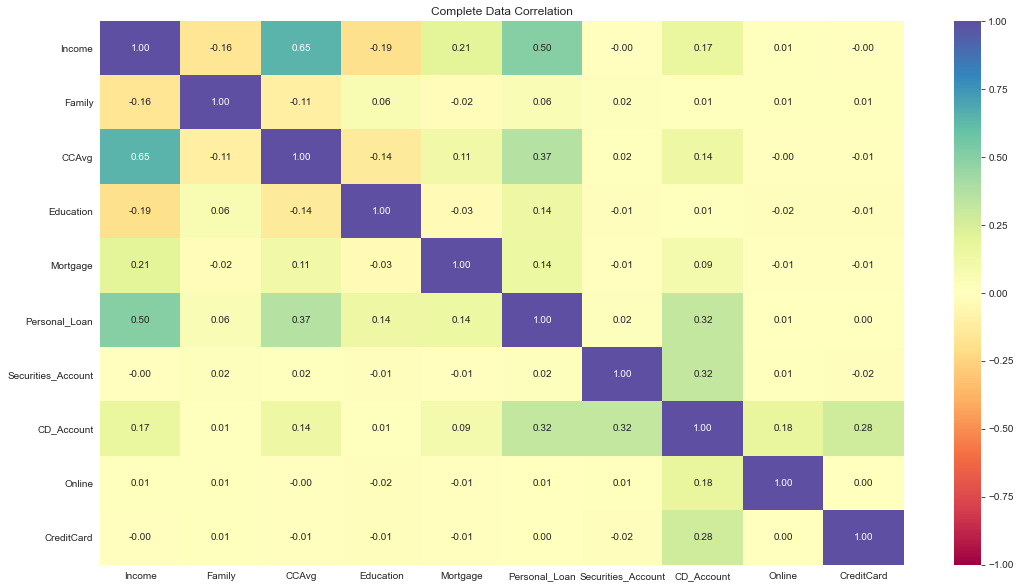

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral").set_title("Complete Data Correlation")
plt.show()


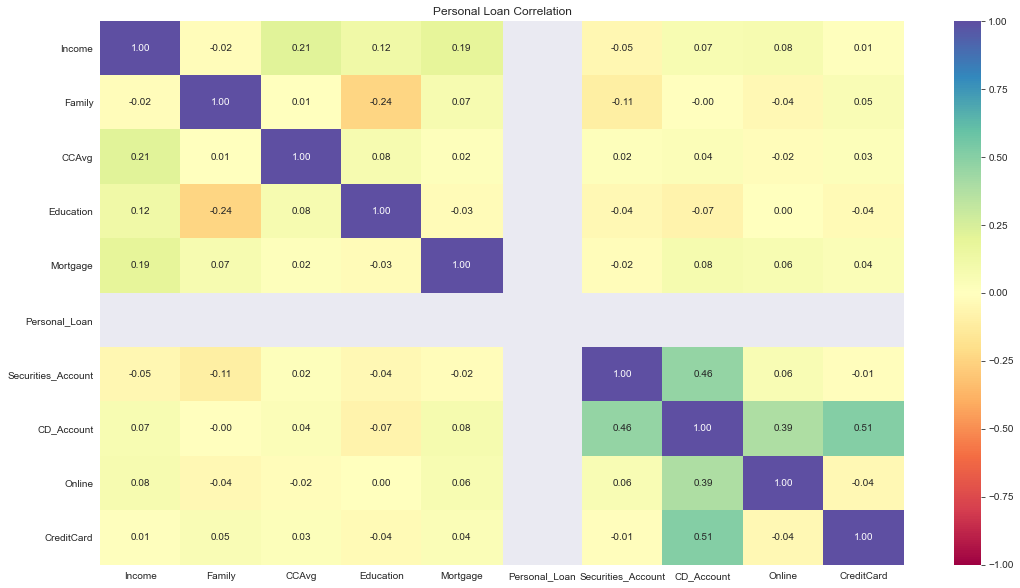

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(18, 10))
sns.heatmap(
    data[data["Personal_Loan"] == 1].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
).set_title("Personal Loan Correlation")
plt.show()


**observations**

* `Personal_Loan` - income, Credit card spending, CD account has some relationship. we have to check this further and understand the relationship, Who got loan last year has good relation with CD_Account, Securities_Account, Online Account and Credit Card

* income and CCAvg has some relation, and who got loans has relation on Securitues account and CD Account, Online and has credit card from other banks.


## Pair Plot

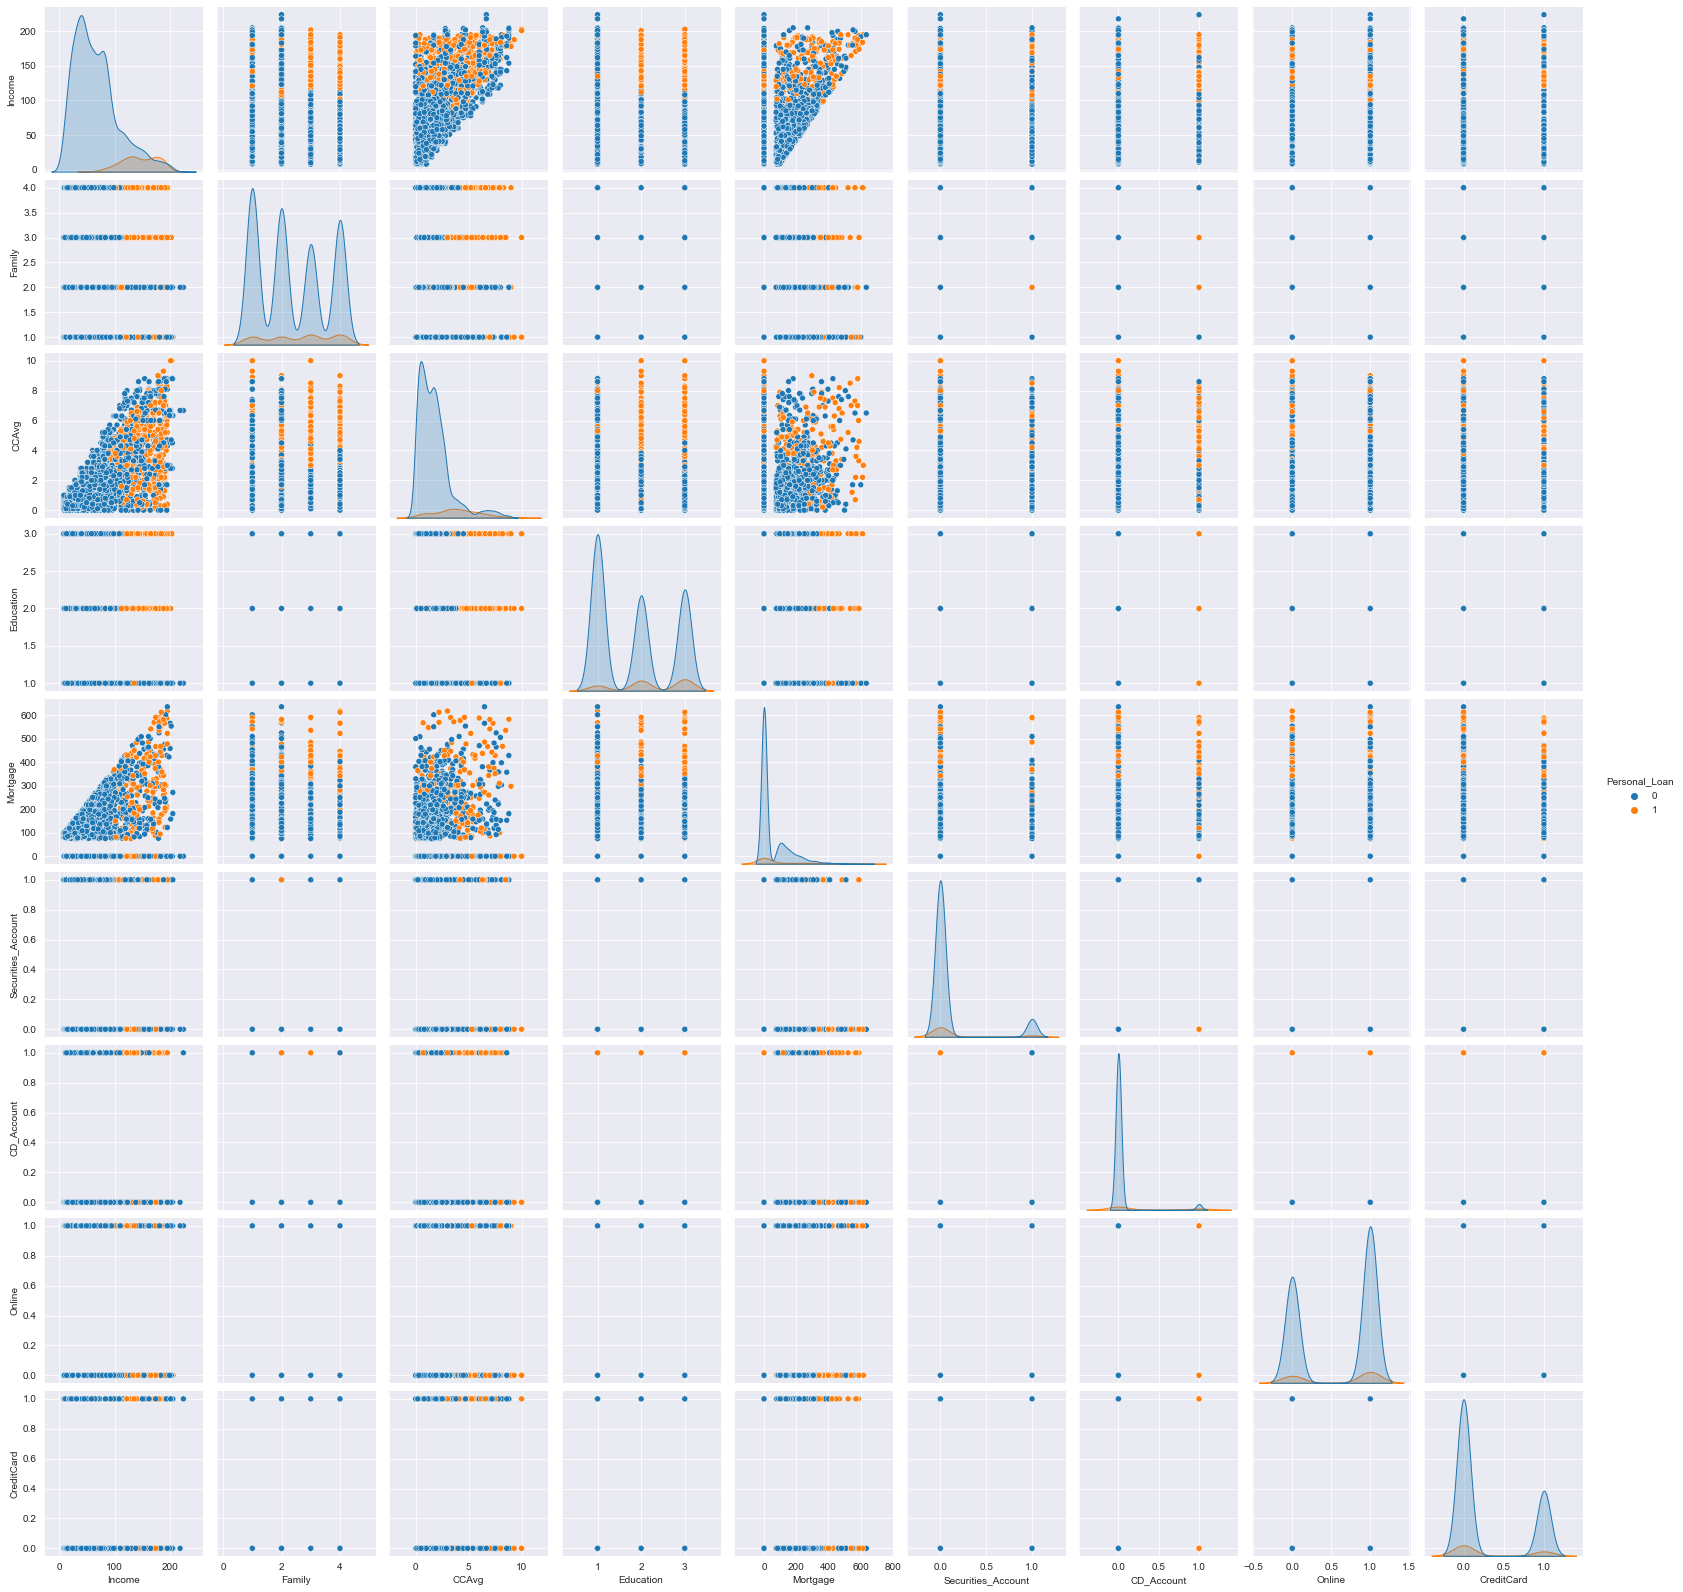

<IPython.core.display.Javascript object>

In [58]:
sns.pairplot(data, hue="Personal_Loan")
plt.show()

**observations**

Income & CCAvg, Income & Mortgage has positive relation , CCAvg & Mortage has scatter relation 

### Summary of EDA

**Data Description:**

* Dependent variable personal loan is a numerical boolean type with 1 - loan offered and accepted, 0 - no loans.
* age range, experience range, county and state are made as categorical type columns
* Securities_Account, CD_Account, Online and CreditCard are boolean type data columns 
* Income, Family, CCAvg, Education and Mortgage are continous numberic numbers 

**Data Cleaning:**

* we did data cleanup and made county and state from zip code, age range from age and experience range from experience 
* No missing values in the given data 
* No outlier treatments or scale conversion because data seems to be normally distributes. There are some high value in mortgage, income and CCAvg but all those are valid values.
* few zipcode does not have county and state associated, we manually searched internet and added those.

**Observations from EDA:**

* `Income`  - income has positive relation with `CCAvg` and only after certain level of income `Personal_Loan`  was offered to customer. Make sense no `Income` or customers with out  `CD_Account` cannot repay loans.   

* `Family` - Family of 3 or 4 offered more loans than 1 or 2, may be because of combined income level will be high            
* `CCAvg`  - spend limit and `Income` is related, and related to `Personal_Loan`       

* `Education`  - Level 2 and 3 offered more loans because of  `Education` level 2 and 3 get more `Income` and  can offered `Personal_Loan` and repay     

* `Mortgage`  - Mortgage has relation with  `Education` level 2 and 3 get more `Income` 

* `Personal_Loan`  - we have onluy 9% customer offered loan, so data is much biased towards not offered loan, We have to handle this when building model.  And has relation with most of the features, like  `Income`,  `Family`, `Education`,  `CD_Account`, `Securities_Account`,  `County`  

* `Securities_Account`  - has some relation with `Personal_Loan`
* `CD_Account`  - has some relation with `Personal_Loan`         
* `Online`  - No much relation with `Personal_Loan`   or other features       
* `CreditCard`  - No much relation with `Personal_Loan`   or other features              
* `County`  - some counties are offered more `Personal_Loan`  and because of `Income` in that county     
* `State`  - All are in california.            
* `AgeRange`  - 5. different age range values, mostly between 25 and 40 offered more loans         
* `ExperienceRange`   - high experience get high income, and more loans offered.  




## Data Preparation & Split Data

### Converting Categorical Features 


In [59]:
X = data.drop("Personal_Loan", axis=1)
Y = data["Personal_Loan"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)



<IPython.core.display.Javascript object>

### Check the data types of the columns in X variable after get_dummies
##### Understand the shape of the dataset.

In [60]:
X.shape

(5000, 60)

<IPython.core.display.Javascript object>

#####  Check the data types of the columns in the dataset.

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Income                         5000 non-null   int64  
 1   Family                         5000 non-null   int64  
 2   CCAvg                          5000 non-null   float64
 3   Education                      5000 non-null   int64  
 4   Mortgage                       5000 non-null   int64  
 5   Securities_Account             5000 non-null   int64  
 6   CD_Account                     5000 non-null   int64  
 7   Online                         5000 non-null   int64  
 8   CreditCard                     5000 non-null   int64  
 9   County_Butte County            5000 non-null   uint8  
 10  County_Contra Costa County     5000 non-null   uint8  
 11  County_El Dorado County        5000 non-null   uint8  
 12  County_Fresno County           5000 non-null   u

<IPython.core.display.Javascript object>

### Split data Training & Test

Now it's time to do a train test split, and train our model!

**Split the data into training set and testing set using train_test_split**

In [62]:
# import train_test_split library

from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [63]:
# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=101
)

<IPython.core.display.Javascript object>

### Lets check split of data in %

In [64]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [65]:
print("Percentage of classes in training set")
print(y_train.value_counts(normalize=True) * 100)
print()
print("Percentage of classes in test set")
print(y_test.value_counts(normalize=True) * 100)

Percentage of classes in training set
0    90.457143
1     9.542857
Name: Personal_Loan, dtype: float64

Percentage of classes in test set
0    90.266667
1     9.733333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

# Model building - Logistic Regression

### Model evaluation criterion



* `Recall` - What proportion of actual positives was identified correctly? It is the measure of the correctly identified positive cases from all the actual positive cases. It is important when the cost of False Negatives is high.

* `Precision` - What proportion of positive identifications was actually correct? It is implied as the measure of the correctly identified positive cases from all the predicted positive cases. Thus, it is useful when the costs of False Positives is high.

* `Accuracy` - What proportion of correct predictions vs total predictions. One of the more obvious metrics, it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.

* `F1-score` - This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.

### Model can make wrong predictions as:
1. Predicting a customer is eligible for loan but in reality the customer is not - Loss of money for bank
2. Predicting a customer is not eligible for loan but in reality the customer is elibigle - Loss of opportunity & revene loss.


### Which case is more important? 
* Both the cases are important, Bank does not want to lose money by giving loan to customers who cannot pay. And bank does not want a revenue oppurtunity to get intrests and repayment from customer who can pay 

* False Negative - Loss of opportunity will be the greater loss as the bank will be losing a potential customer.

* False Positive - will cost money to bank since customer may not pay back loan.


### How to reduce this loss 

*  Maximize `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.
* Maximize `recall`  should be maximized, Bank would want to reduce false negatives, Greater the recall lesser the chances of false negatives.
* Maximize `Precision`  should be maximized, so bank can make money by providing loans to eligible customers.


#### Create functions to calculate different metrics and confusion matrix

* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [66]:
# import libraries
from sklearn.linear_model import LogisticRegression

# To build model for prediction
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

<IPython.core.display.Javascript object>

In [67]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5, modelname="", datatype=""
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Model":modelname,"Data":datatype,"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,"Threshold":threshold},
        index=[0],
    )

    return df_perf


# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True")
    plt.xlabel("Predicted")




<IPython.core.display.Javascript object>

## Training and Predicting

### Logistic Regression

**Train and fit a logistic regression model on the training set.**

In [68]:
# using newton-cg solver since its faster for high-dimensional data
model1 = LogisticRegression(solver="newton-cg", random_state=1)
lg1 = model1.fit(X_train, y_train)


<IPython.core.display.Javascript object>

## Model performance evaluation and improvement

**Now predict values for the testing data. And Create a classification report for the model.**


### Checking model performance on training & test set

#### Checking model performance on training set

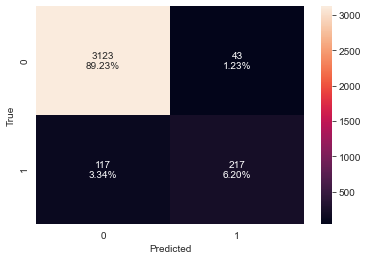

<IPython.core.display.Javascript object>

In [69]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg1, X_train, y_train, threshold=0.5)

In [70]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg1, X_train, y_train, threshold=0.5, modelname="Default", datatype="Train"
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Model,Data,Accuracy,Recall,Precision,F1,Threshold
0,Default,Train,0.954286,0.649701,0.834615,0.73064,0.5


<IPython.core.display.Javascript object>

#### Checking performance on test set

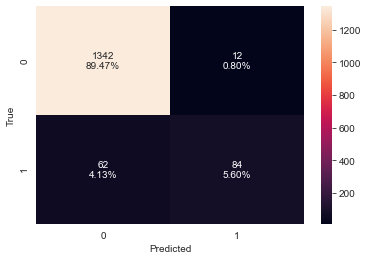

<IPython.core.display.Javascript object>

In [71]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg1, X_test, y_test)

In [72]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg1, X_test, y_test, threshold=0.5, modelname="Default", datatype="Test"
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Model,Data,Accuracy,Recall,Precision,F1,Threshold
0,Default,Test,0.950667,0.575342,0.875,0.694215,0.5


<IPython.core.display.Javascript object>

#### ROC-AUC

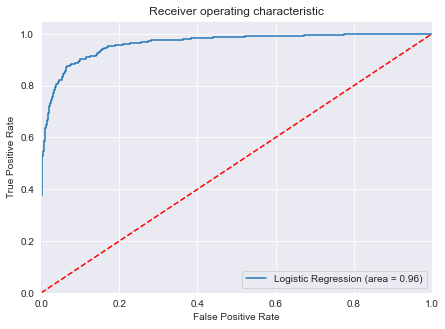

<IPython.core.display.Javascript object>

In [73]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on data but the recall, F1 score is low. Perision and Accuracy is high but that is becaused of biased data. 
* ROC-AUC curve is good, But since data is biased we have to look to improve further.

### Model Improvement Opportunities

**Optimal threshold using AUC-ROC curve**

In [74]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(f"Optimal threshold value is {optimal_threshold_auc_roc}")

Optimal threshold value is 0.16127516065808437


<IPython.core.display.Javascript object>

#### Checking model performance on training & test set

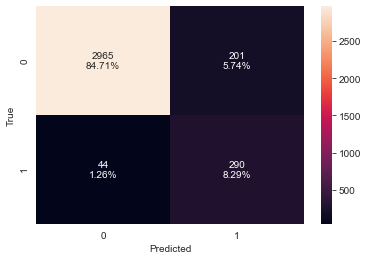

<IPython.core.display.Javascript object>

In [75]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg1, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [76]:
# checking model performance for this model - training
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg1,
    X_train,
    y_train,
    threshold=optimal_threshold_auc_roc,
    modelname="Optimal threshold value",
    datatype="Train",
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Model,Data,Accuracy,Recall,Precision,F1,Threshold
0,Optimal threshold value,Train,0.93,0.868263,0.590631,0.70303,0.161275


<IPython.core.display.Javascript object>

In [77]:
# checking model performance for this model - test
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg1,
    X_test,
    y_test,
    threshold=optimal_threshold_auc_roc,
    modelname="Optimal threshold value",
    datatype="Test",
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Model,Data,Accuracy,Recall,Precision,F1,Threshold
0,Optimal threshold value,Test,0.916,0.80137,0.546729,0.65,0.161275


<IPython.core.display.Javascript object>

* Logistic Regression model with Optimal threshold value is giving a good performance on data where recall score is better than previous model tthresholdr, but Precision and F1 score is low.  

* lets try with  Precision-Recall curve to find better threshold

#### Let's use Precision-Recall curve and see if we can find a better threshold

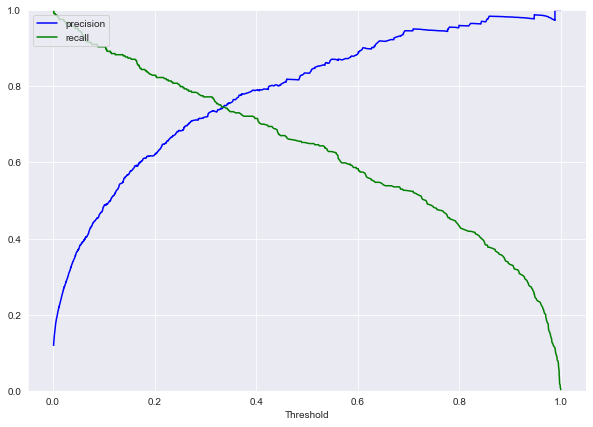

<IPython.core.display.Javascript object>

In [78]:
y_scores = lg1.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.36 we will get equal precision(.75) and recall(.75) - lets use this and see 
#### Checking model performance on training & test set

In [79]:
# setting the threshold
optimal_threshold_curve = 0.36

<IPython.core.display.Javascript object>

In [80]:
# checking model performance for this model
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg1,
    X_train,
    y_train,
    threshold=optimal_threshold_curve,
    modelname="Thres Recall vs Preci",
    datatype="Train",
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Model,Data,Accuracy,Recall,Precision,F1,Threshold
0,Thres Recall vs Preci,Train,0.953143,0.730539,0.767296,0.748466,0.36


<IPython.core.display.Javascript object>

In [81]:
# checking model performance for this model
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg1,
    X_test,
    y_test,
    threshold=optimal_threshold_curve,
    modelname="Thres Recall vs Preci",
    datatype="Test",
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Model,Data,Accuracy,Recall,Precision,F1,Threshold
0,Thres Recall vs Preci,Test,0.948,0.650685,0.778689,0.708955,0.36


<IPython.core.display.Javascript object>

### Model Performance Summary

lets compare all the data and see which threshold gives better options 

* Default threshold - 0.5
* Optimal threshold value auc roc
* Optimal threshold from curve - recall vs precision 


In [82]:
# conact all data we collected so far

pd.concat(
    [
        log_reg_model_train_perf,
        log_reg_model_test_perf,
        log_reg_model_train_perf_threshold_auc_roc,
        log_reg_model_test_perf_threshold_auc_roc,
        log_reg_model_train_perf_threshold_curve,
        log_reg_model_test_perf_threshold_curve,
    ],
    axis=0,
)

,Model,Data,Accuracy,Recall,Precision,F1,Threshold
0,Default,Train,0.954286,0.649701,0.834615,0.730640,0.500000
0,Default,Test,0.950667,0.575342,0.875000,0.694215,0.500000
0,Optimal threshold value,Train,0.930000,0.868263,0.590631,0.703030,0.161275
0,Optimal threshold value,Test,0.916000,0.801370,0.546729,0.650000,0.161275
0,Thres Recall vs Preci,Train,0.953143,0.730539,0.767296,0.748466,0.360000
0,Thres Recall vs Preci,Test,0.948000,0.650685,0.778689,0.708955,0.360000


<IPython.core.display.Javascript object>

**observations**

* `Default` - comparing to other models, Recall score is low - Bank may provide loan to custmers not eligible and lose money
* `Optimal threshold value` - High recall vlaues, Bank may not give loan to customer not eligible but its also not predicting eligible customers - so bank might lose potential new loan customenrs.
* `Thres Recall vs Preci` - this model has balanced recall vs f1 - where bank still prevent loans for not eligible customers and provide loans for eligible. 


## Enhancements - Sequential Feature Selector

`Thres Recall vs Preci` enhance model with Forward Feature Selection using SequentialFeatureSelector.

* In each forward step, you add the one variable that gives the single best improvement to your model.
* We'll use forward feature selection on all the variables.

and see we can find a better model.


In [83]:
# import feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

<IPython.core.display.Javascript object>

#### Selecting subset of important features using Sequential Feature Selector method

In [84]:
#using X & Y which is already built 


featureLG = LogisticRegression(solver="newton-cg", random_state=1)

# Build step forward feature selection
sfs = SFS(
    featureLG,
    k_features=X_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    n_jobs=-1,
    scoring="f1",
    cv=5,
)


<IPython.core.display.Javascript object>

In [85]:
# Train SFS with our dataset
sfs = sfs.fit(X_train, y_train)

# Print the results
print("Best f1 score: %.2f" % sfs.k_score_)  # k_score_ shows the best score
print()
print(
    "Best subset (indices):", sfs.k_feature_idx_
)  # k_feature_idx_ shows the index of features
# that yield the best score
print()
print(
    "Best subset (corresponding names):", sfs.k_feature_names_
)  # k_feature_names_ shows the feature names

Best f1 score: 0.71

Best subset (indices): (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59)

Best subset (corresponding names): ('Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'C

<IPython.core.display.Javascript object>

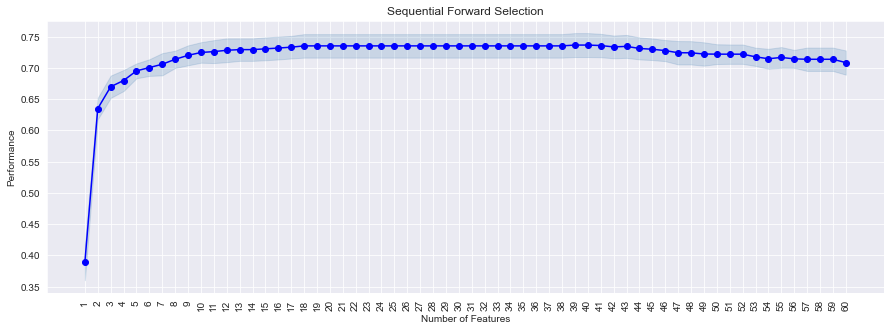

<IPython.core.display.Javascript object>

In [86]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection")
plt.xticks(rotation=90)
plt.show()

### Observation

* as we can see we get better result after 15 features, and reaches peakt at 20 and stays stable till 45.
* lets build a model with 20 featuers and see how report looks 

### Lets build a model with top 20 features and see how results looks

In [87]:
# using X & Y which is already built


featureLG = LogisticRegression(solver="newton-cg", random_state=1)

# Build step forward feature selection
sfs = SFS(
    featureLG,
    k_features=20,
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    n_jobs=-1,
    scoring="f1",
    cv=5,
)
# Train SFS with our dataset
sfs = sfs.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [88]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 24, 28, 33, 41, 44, 54, 57]


<IPython.core.display.Javascript object>

### Columns used for this Model

In [89]:
# let us look at the names of the important features
X_train.columns[feat_cols]

Index(['Income', 'Family', 'Education', 'Mortgage', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County_Butte County',
       'County_Contra Costa County', 'County_El Dorado County',
       'County_Fresno County', 'County_Los Angeles County',
       'County_Placer County', 'County_San Bernardino County',
       'County_San Mateo County', 'County_Stanislaus County',
       'County_Ventura County', 'ExperienceRange_6 to 9',
       'ExperienceRange_20 to 29'],
      dtype='object')

<IPython.core.display.Javascript object>

In [90]:
x_train_final = X_train[X_train.columns[feat_cols]]
# Creating new x_test with the same variables that we selected for x_train
x_test_final = X_test[x_train_final.columns]

<IPython.core.display.Javascript object>

In [91]:
# using newton-cg solver since its faster for high-dimensional data
model2 = LogisticRegression(solver="newton-cg", random_state=1)
lg2 = model1.fit(x_train_final, y_train)

<IPython.core.display.Javascript object>

In [92]:
# checking model performance for this model
log_reg_model_train_sfs = model_performance_classification_sklearn_with_threshold(
    lg2,
    x_train_final,
    y_train,
    threshold=optimal_threshold_curve,
    modelname="Top Features from SFS",
    datatype="Train",
)
print("Training performance:")
log_reg_model_train_sfs

Training performance:


,Model,Data,Accuracy,Recall,Precision,F1,Threshold
0,Top Features from SFS,Train,0.949714,0.721557,0.743827,0.732523,0.36


<IPython.core.display.Javascript object>

In [93]:
# checking model performance for this model
log_reg_model_test_sfs = model_performance_classification_sklearn_with_threshold(
    lg2,
    x_test_final,
    y_test,
    threshold=optimal_threshold_curve,
    modelname="Top Features from SFS",
    datatype="Test",
)
print("Training performance:")
log_reg_model_test_sfs

Training performance:


,Model,Data,Accuracy,Recall,Precision,F1,Threshold
0,Top Features from SFS,Test,0.946667,0.657534,0.761905,0.705882,0.36


<IPython.core.display.Javascript object>

In [94]:
# conact all data we collected so far

pd.concat(
    [
        log_reg_model_train_perf,
        log_reg_model_test_perf,
        log_reg_model_train_perf_threshold_auc_roc,
        log_reg_model_test_perf_threshold_auc_roc,
        log_reg_model_train_perf_threshold_curve,
        log_reg_model_test_perf_threshold_curve,
        log_reg_model_train_sfs,
        log_reg_model_test_sfs,
    ],
    axis=0,
)

,Model,Data,Accuracy,Recall,Precision,F1,Threshold
0,Default,Train,0.954286,0.649701,0.834615,0.730640,0.500000
0,Default,Test,0.950667,0.575342,0.875000,0.694215,0.500000
0,Optimal threshold value,Train,0.930000,0.868263,0.590631,0.703030,0.161275
0,Optimal threshold value,Test,0.916000,0.801370,0.546729,0.650000,0.161275
0,Thres Recall vs Preci,Train,0.953143,0.730539,0.767296,0.748466,0.360000
0,Thres Recall vs Preci,Test,0.948000,0.650685,0.778689,0.708955,0.360000
0,Top Features from SFS,Train,0.949714,0.721557,0.743827,0.732523,0.360000
0,Top Features from SFS,Test,0.946667,0.657534,0.761905,0.705882,0.360000


<IPython.core.display.Javascript object>

### Conclusion on Logistic Regression Model

* `Top Features from SFS` - Modal has good accuracy & f1 score compared to all models we built. Precision is also high. Recall is little lesser than `Thres Recall vs Preci` Model. 

* `Thres Recall vs Preci` - has overall better score on F1, Recall & Accuracy. This model is better fit for the bank

#### Finding the coefficients on the best model

In [95]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg1.coef_, lg1.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.sort_values(by="Coefficients", ascending=False)

ValueError: Shape of passed values is (21, 1), indices imply (61, 1)

<IPython.core.display.Javascript object>

**Important Coefficient interpretations**

* Intercept value is -13.470336 - thats fine because we have to find eligible customers
* High features to consider is  - Customers with CD_Account, with High Education levels, Big family and high income counties 
* Avoid - Person has external credit cards, ExperienceRange_>=40 people about to retire, low income counties, has securites Securities_Account
* Avoid Age more than 50 


# Model building - Decision Tree

## Build Decision Tree Model

In [ ]:
#import DecisionTree & GridSearchCV

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)


In [ ]:
modelDM1 = DecisionTreeClassifier(criterion="gini", random_state=1)
modelDM1.fit(X_train, y_train)

#### Checking model performance on training set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(modelDM1, X_train, y_train, threshold=0)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn_with_threshold(
    modelDM1, X_train, y_train, threshold=0, modelname="Default", datatype="Train",
)
decision_tree_perf_train

#### Checking model performance on test set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(modelDM1, X_test, y_test, threshold=0)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn_with_threshold(
    modelDM1, X_test, y_test, threshold=0, modelname="Default", datatype="Train",
)
decision_tree_perf_test

**observation on default model performance**

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.
* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

## Visualizing the Decision Tree

In [ ]:
## creating a list of column names
feature_names = X_train.columns.to_list()

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    modelDM1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## Text report - decision tree -


In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(modelDM1, feature_names=feature_names, show_weights=True))

#### important features 

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        modelDM1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = modelDM1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


**observations** 

* we know this model is too complex and overfit data a lot. We like to reduce overfitting Pruning techniques
* Education, Income, Family  and CCAvg contribute high importance 

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.05, 1: 0.95})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15,20,25, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}


# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)


In [ ]:
estimator.criterion

In [ ]:
estimator.splitter

**observations**

* max depth of tree selected is 5
* best min impurity decrease selected is 0.01
* best criterion selected is entropy
* best splitter is best 

#### Checking performance on training set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(estimator, X_train, y_train, threshold=0)

In [ ]:
decision_tree_perf_train_HP = model_performance_classification_sklearn_with_threshold(
    estimator,
    X_train,
    y_train,
    threshold=0,
    modelname="Hyperparameter tuning",
    datatype="Train",
)
decision_tree_perf_train_HP

#### Checking performance on test set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(estimator, X_test, y_test, threshold=0)

In [ ]:
decision_tree_perf_test_HP = model_performance_classification_sklearn_with_threshold(
    estimator,
    X_test,
    y_test,
    threshold=0,
    modelname="Hyperparameter tuning",
    datatype="Test",
)
decision_tree_perf_test_HP

**observations**

* after tuning, we see better results on test. Training data result is perfect but test is not matching closely with Training. We should look for still better optimization. 




## Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### important features 

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


### Key Features
**observations on important features on tuning**

* Income, CCAvg, Education & family are key featueres.  Income is contributing a lot for decision making. 



## Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.05, 1: 0.95})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.05, 1: 0.95}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 and Recall vs alpha for training and testing sets


In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xlabel("alpha")
ax.set_ylabel("Score")
ax.set_title("F1 & Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="F1 train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="F1 test", drawstyle="steps-post")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="Recall train", drawstyle="steps-post"
)
ax.plot(
    ccp_alphas, recall_test, marker="o", label="Recall test", drawstyle="steps-post"
)
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

#### Checking model performance on training set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(best_model, X_train, y_train, threshold=0)

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn_with_threshold(
    best_model, X_train, y_train,   threshold=0,
    modelname="Post pruned tuning",
    datatype="Train",
)
decision_tree_postpruned_perf_train




#### Checking model performance on test set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(best_model, X_test, y_test, threshold=0)

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn_with_threshold(
    best_model, X_test, y_test,   threshold=0,
    modelname="Post pruned tuning",
    datatype="Test",
)
decision_tree_postpruned_perf_test


### Comparing all the decision tree models

In [ ]:
# conact all data we collected so far

pd.concat(
    [
        decision_tree_perf_train,
        decision_tree_perf_test,
        decision_tree_perf_train_HP,
        decision_tree_perf_test_HP,
        decision_tree_postpruned_perf_train,
        decision_tree_postpruned_perf_test,
    ],
    axis=0,
)

### Conclusion on Decision tree Models


* Decision tree has given better result than Logistic Regression Models we tried. 
* Default decision tree recall/f1 score does not match for train and test, Since data is basied towards 0. we cannot really trust the accuracy score. We should not use this model.

* Pre and Post pruned model given better results and very much comparable. Pre pruning misses in recall that means it might give loan to customner who cannot pay.

* post pruned shows beeter result in recall and f1 score. 

## Visualizing best model Decision Tree

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### important features on Best Model

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Conclusions
* Bank should focus on giving loans on high effective featues like customers earning good income, having high education level and multiple people working in household/family and has decent credit spending & having CD account.

* Bank should reach customer with good income and education level 2 or 3 
* Bank should reach customer who has 3-4 family members working and making good income.

* Bank should avoid age beyond 50 or having more exprience like 40 yrs because they might be old.


## Actionable Insights & Recommendations


Allbank should focus to find more potential customers and make them personal loan, Last year they gave 9% customers, But they have more potential ccustomer.

##### Bank should reach 

* Should target high `Income` customers with decent credit usage they would repay `Personal_Loan` promptly.
* Customers with `Education` level 2 and 3 with good income
* Customer with  `Family` 3 or 4 making good income
* Customer already had `CD account` in bank
* Experience Range less than 30 yrs with google income 
* Age Range less than 50 years 
* Customers with good income and consistent `CCAvg` usage.
* Customers living in Los Angeles County , Santa Clara County, San Diego County and Alameda County makes more income

##### Bank should avoid 

* Customers more than `Age` 50 yrs or with `Experience Range` more than 40 yrs, They about to retire so risk in Loan repayment 
* Customer with no `Income` or income <50K
* Customers living in low income counties
* Customer own external credit card with high CC avg and with mortage.



In [ ]:
end = datetime.datetime.now()
print(f'Total Time Taken : {end-start}')